# <span style="color:green"> Healthcare Capstone Project </span>

### <span style="color:brown"> Problem Statement:

Evanston Hospital is a comprehensive acute-care facility in Illinois, US. The hospital offers a wide range of services and surgical specialities, in addition to having high-end lab capabilities. Despite spending a considerable amount of resources on improving its services, the hospital’s CMS rating has remained at 3 for the past 5 years, and this has led to a steady decline in revenue for the hospital. For hospitals like Evanston, these ratings directly influence the choice made by consumers who are looking for a healthcare provider and would, therefore, have a significant impact on the hospitals’ revenues. As a consulting company hired by Evanston, our task is to identify possible root causes for the hospital getting such an average rating and recommend measures to mitigate this problem.

### <span style="color:brown"> The Solution Methodology:
The proposed approach for this Capstone project involves employing structured problem-solving techniques to identify potential root causes behind the challenges experienced by Evanston Hospital. Additionally, we plan to develop a rating prediction model using historical hospital data to serve as a proof of concept. The steps include:
* Data Preparation: Clean and preprocess the data.
* Exploratory Data Analysis (EDA) and feature engineering.
* Model Training: Train various machine learning models.
* Model Selection: Choose the best-performing model.
* Insights and Recommendations: Share insights and propose solutions.

### <span style="color:Brown"> Data Dictionary 

The Overall Hospital Quality Star Rating is calculated using 64 existing quality measures across seven different measure groups. 
The Different measures used are referred to in the documents -  
* https://media.wbur.org/wp/2016/07/Hospital_Quality_Star_Ratings.pdf
    
|Group	|No. of Measures	|Weightage	|Dataset	|Measures|
| :- | :- | :- | :- | :- | 
|Mortality	|7	|22	|Readmissions and Deaths|'MORT_30_AMI', 'MORT_30_CABG', 'MORT_30_COPD', 'MORT_30_HF', 'MORT_30_PN', 'MORT_30_STK'|  
||||Complications|'PSI_4_SURG_COMP'|
|Safety of Care	|8	|22	|Healthcare Associated Infections|'HAI_1_SIR', 'HAI_1a_SIR', 'HAI_2_SIR', 'HAI_2a_SIR', 'HAI_3_SIR', 'HAI_4_SIR', 'HAI_5_SIR', 'HAI_6_SIR'|    
||||Complications|'COMP-HIP-KNEE', 'PSI-90'|
|Readmission	|8	|22	|Readmissions and Deaths|'READM_30_AMI', 'READM_30_CABG','READM_30_COPD', 'READM_30_HF',   'READM_30_HIP_KNEE', 'READM_30_HOSP_WIDE', 'READM_30_PN', 'READM_30_STK'|   
|Patient Experience	|11	|22	|HCAHPS|'H_CLEAN_STAR_RATING', 'H_COMP_1_STAR_RATING', 'H_COMP_2_STAR_RATING', 'H_COMP_3_STAR_RATING', 'H_COMP_4_STAR_RATING', 'H_COMP_5_STAR_RATING', 'H_COMP_6_STAR_RATING', 'H_COMP_7_STAR_RATING', 'H_HSP_RATING_STAR_RATING', 'H_QUIET_STAR_RATING', 'H_RECMND_STAR_RATING'|    
|Effectiveness of Care	|18	|4	|Timely and Effective Care|'CAC_3', 'IMM_2', 'IMM_3_OP_27_FAC_ADHPCT', 'OP_4', 'OP_22', 'OP_23', 'OP_29', 'OP_30', 'PC_01', 'STK_1', 'STK_4', 'STK_6', 'STK_8', 'VTE_1', 'VTE_2', 'VTE_3', 'VTE_5', 'VTE_6'|   
|Timeliness of Care	|7	|4	|Timely and Effective Care|'ED_1b', 'ED_2b', 'OP_3b', 'OP_5', 'OP_18b', 'OP_20', 'OP_21'|   
|Efficient Use of Medical Imaging 	|5	|4	|Outpatient Imaging Efficiency|'OP_10', 'OP_11', 'OP_13', 'OP_14', 'OP_8'|  


## <span style="color:brown"> 1. Import Data and Initial Analysis

###  <span style="color:brown"> 1.1 Importing necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns', None)
pd.options.display.max_rows = 500

###  <span style="color:brown">1.2 Data Import - Hospital General Information

In [2]:
# Hospital General Information Dataset.This Dataset contains the Target Variable - The final Hospital overall rating
df_hgi = pd.read_csv('Hospital General Information.csv',encoding='unicode_escape')
df_hgi.head()

,Provider ID,Hospital Name,Address,City,State,ZIP Code,County Name,Phone Number,Hospital Type,Hospital Ownership,Emergency Services,Meets criteria for meaningful use of EHRs,Hospital overall rating,Hospital overall rating footnote,Mortality national comparison,Mortality national comparison footnote,Safety of care national comparison,Safety of care national comparison footnote,Readmission national comparison,Readmission national comparison footnote,Patient experience national comparison,Patient experience national comparison footnote,Effectiveness of care national comparison,Effectiveness of care national comparison footnote,Timeliness of care national comparison,Timeliness of care national comparison footnote,Efficient use of medical imaging national comparison,Efficient use of medical imaging national comparison footnote
0,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,Acute Care Hospitals,Government - Hospital District or Authority,Yes,Y,3,NaN,Same as the National average,NaN,Above the National average,NaN,Same as the National average,NaN,Below the National average,NaN,Same as the National average,NaN,Same as the National average,NaN,Same as the National average,NaN
1,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,MARSHALL,2565938310,Acute Care Hospitals,Government - Hospital District or Authority,Yes,Y,3,NaN,Below the National average,NaN,Same as the National average,NaN,Above the National average,NaN,Same as the National average,NaN,Same as the National average,NaN,Above the National average,NaN,Below the National average,NaN
2,10006,ELIZA COFFEE MEMORIAL HOSPITAL,205 MARENGO STREET,FLORENCE,AL,35631,LAUDERDALE,2567688400,Acute Care Hospitals,Government - Hospital District or Authority,Yes,Y,2,NaN,Below the National average,NaN,Same as the National average,NaN,Same as the National average,NaN,Below the National average,NaN,Same as the National average,NaN,Above the National average,NaN,Same as the National average,NaN
3,10007,MIZELL MEMORIAL HOSPITAL,702 N MAIN ST,OPP,AL,36467,COVINGTON,3344933541,Acute Care Hospitals,Voluntary non-profit - Private,Yes,Y,3,NaN,Same as the National average,NaN,Same as the National average,NaN,Below the National average,NaN,Same as the National average,NaN,Same as the National average,NaN,Above the National average,NaN,Not Available,Results are not available for this reporting p...
4,10008,CRENSHAW COMMUNITY HOSPITAL,101 HOSPITAL CIRCLE,LUVERNE,AL,36049,CRENSHAW,3343353374,Acute Care Hospitals,Proprietary,Yes,Y,3,NaN,Same as the National average,NaN,Not Available,Results are not available for this reporting p...,Same as the National average,NaN,Not Available,Results are not available for this reporting p...,Same as the National average,NaN,Above the National average,NaN,Not Available,Results are not available for this reporting p...


In [3]:
df_hgi.shape

(4818, 28)

In [4]:
df_hgi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4818 entries, 0 to 4817
Data columns (total 28 columns):
 #   Column                                                         Non-Null Count  Dtype 
---  ------                                                         --------------  ----- 
 0   Provider ID                                                    4818 non-null   int64 
 1   Hospital Name                                                  4818 non-null   object
 2   Address                                                        4818 non-null   object
 3   City                                                           4818 non-null   object
 4   State                                                          4818 non-null   object
 5   ZIP Code                                                       4818 non-null   int64 
 6   County Name                                                    4803 non-null   object
 7   Phone Number                                                   4818 n

In [5]:
# Create a list of columns to keep (those without 'footnote' in their names)
colm_to_keep = [col for col in df_hgi.columns if 'footnote' not in col]

# Select only the columns you want to keep
df_hgi = df_hgi[colm_to_keep]
df_hgi.head(3)

,Provider ID,Hospital Name,Address,City,State,ZIP Code,County Name,Phone Number,Hospital Type,Hospital Ownership,Emergency Services,Meets criteria for meaningful use of EHRs,Hospital overall rating,Mortality national comparison,Safety of care national comparison,Readmission national comparison,Patient experience national comparison,Effectiveness of care national comparison,Timeliness of care national comparison,Efficient use of medical imaging national comparison
0,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,Acute Care Hospitals,Government - Hospital District or Authority,Yes,Y,3,Same as the National average,Above the National average,Same as the National average,Below the National average,Same as the National average,Same as the National average,Same as the National average
1,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,MARSHALL,2565938310,Acute Care Hospitals,Government - Hospital District or Authority,Yes,Y,3,Below the National average,Same as the National average,Above the National average,Same as the National average,Same as the National average,Above the National average,Below the National average
2,10006,ELIZA COFFEE MEMORIAL HOSPITAL,205 MARENGO STREET,FLORENCE,AL,35631,LAUDERDALE,2567688400,Acute Care Hospitals,Government - Hospital District or Authority,Yes,Y,2,Below the National average,Same as the National average,Same as the National average,Below the National average,Same as the National average,Above the National average,Same as the National average


In [6]:
df_hgi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4818 entries, 0 to 4817
Data columns (total 20 columns):
 #   Column                                                Non-Null Count  Dtype 
---  ------                                                --------------  ----- 
 0   Provider ID                                           4818 non-null   int64 
 1   Hospital Name                                         4818 non-null   object
 2   Address                                               4818 non-null   object
 3   City                                                  4818 non-null   object
 4   State                                                 4818 non-null   object
 5   ZIP Code                                              4818 non-null   int64 
 6   County Name                                           4803 non-null   object
 7   Phone Number                                          4818 non-null   int64 
 8   Hospital Type                                         4818 non-null 

###  <span style="color:brown"> 1.3 Data Analysis - Hospital General Information

#### 1.3.1 Number of unique features  in a column

In [7]:
# Function to count unique categories in a column
def unique_count(data):
    data_type = data.dtypes
    unique_count = data.nunique()
    
    unique_count_df = pd.DataFrame({'data_type': data_type,
                                    'unique_count': unique_count})
    return unique_count_df

In [8]:
unique_count(df_hgi).T

,Provider ID,Hospital Name,Address,City,State,ZIP Code,County Name,Phone Number,Hospital Type,Hospital Ownership,Emergency Services,Meets criteria for meaningful use of EHRs,Hospital overall rating,Mortality national comparison,Safety of care national comparison,Readmission national comparison,Patient experience national comparison,Effectiveness of care national comparison,Timeliness of care national comparison,Efficient use of medical imaging national comparison
data_type,int64,object,object,object,object,int64,object,int64,object,object,object,object,object,object,object,object,object,object,object,object
unique_count,4818,4617,4789,2949,56,4419,1565,4803,3,10,2,1,6,4,4,4,4,4,4,4


#### 1.3.2 To convert all comparison columns to values
* 'Above the National average': 3,
* 'Same as the National average': 2,
* 'Below the National average': 1,
* 'Not Available': 0

In [9]:
comparison_filter = df_hgi.filter(regex='comparison').columns

unique_values = {col: pd.unique(df_hgi[col]) for col in comparison_filter}

# Display unique values for each comparison column
for col, values in unique_values.items():
    print(f'{col} \n************************************************************')
    
    print(values)

Mortality national comparison 
************************************************************
['Same as the National average' 'Below the National average'
 'Not Available' 'Above the National average']
Safety of care national comparison 
************************************************************
['Above the National average' 'Same as the National average'
 'Not Available' 'Below the National average']
Readmission national comparison 
************************************************************
['Same as the National average' 'Above the National average'
 'Below the National average' 'Not Available']
Patient experience national comparison 
************************************************************
['Below the National average' 'Same as the National average'
 'Not Available' 'Above the National average']
Effectiveness of care national comparison 
************************************************************
['Same as the National average' 'Below the National average'
 'Above the Nationa

In [10]:
comparison_dict = {'Above the National average': 3,
                   'Same as the National average': 2,
                   'Below the National average': 1,
                   'Not Available': 0}

# Define a function to apply the mapping
def map_values(value):
    return comparison_dict.get(value, value)

# Apply the mapping function to the specified columns
df_hgi[comparison_filter] = df_hgi[comparison_filter].applymap(map_values)

df_hgi.head()

,Provider ID,Hospital Name,Address,City,State,ZIP Code,County Name,Phone Number,Hospital Type,Hospital Ownership,Emergency Services,Meets criteria for meaningful use of EHRs,Hospital overall rating,Mortality national comparison,Safety of care national comparison,Readmission national comparison,Patient experience national comparison,Effectiveness of care national comparison,Timeliness of care national comparison,Efficient use of medical imaging national comparison
0,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,Acute Care Hospitals,Government - Hospital District or Authority,Yes,Y,3,2,3,2,1,2,2,2
1,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,MARSHALL,2565938310,Acute Care Hospitals,Government - Hospital District or Authority,Yes,Y,3,1,2,3,2,2,3,1
2,10006,ELIZA COFFEE MEMORIAL HOSPITAL,205 MARENGO STREET,FLORENCE,AL,35631,LAUDERDALE,2567688400,Acute Care Hospitals,Government - Hospital District or Authority,Yes,Y,2,1,2,2,1,2,3,2
3,10007,MIZELL MEMORIAL HOSPITAL,702 N MAIN ST,OPP,AL,36467,COVINGTON,3344933541,Acute Care Hospitals,Voluntary non-profit - Private,Yes,Y,3,2,2,1,2,2,3,0
4,10008,CRENSHAW COMMUNITY HOSPITAL,101 HOSPITAL CIRCLE,LUVERNE,AL,36049,CRENSHAW,3343353374,Acute Care Hospitals,Proprietary,Yes,Y,3,2,0,2,0,2,3,0


#### 1.3.3 Plot the percentages for the comparison ratings for Hospital star ratings. 

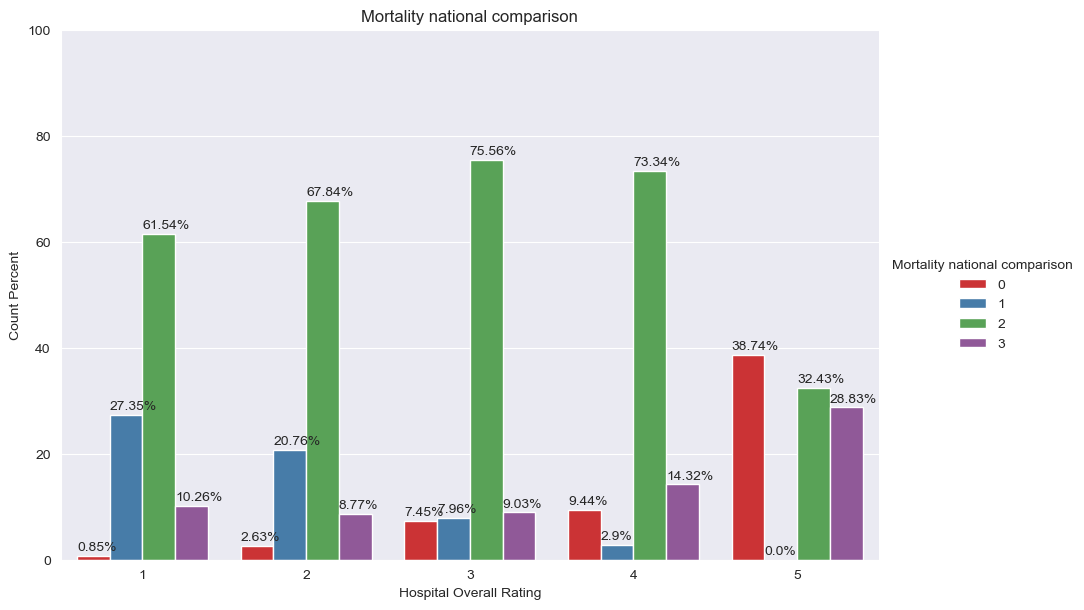

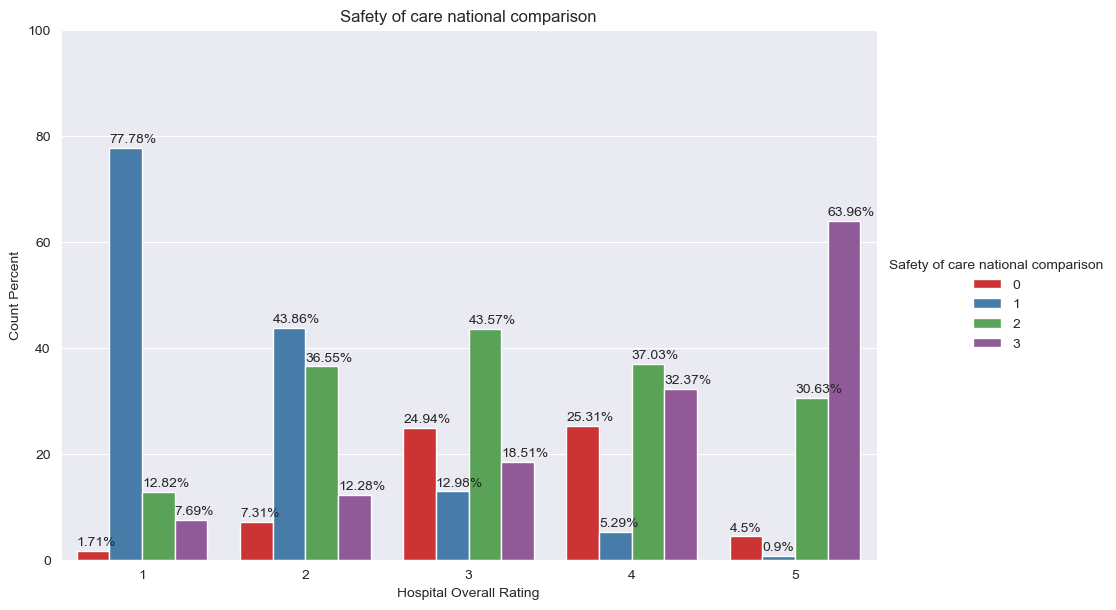

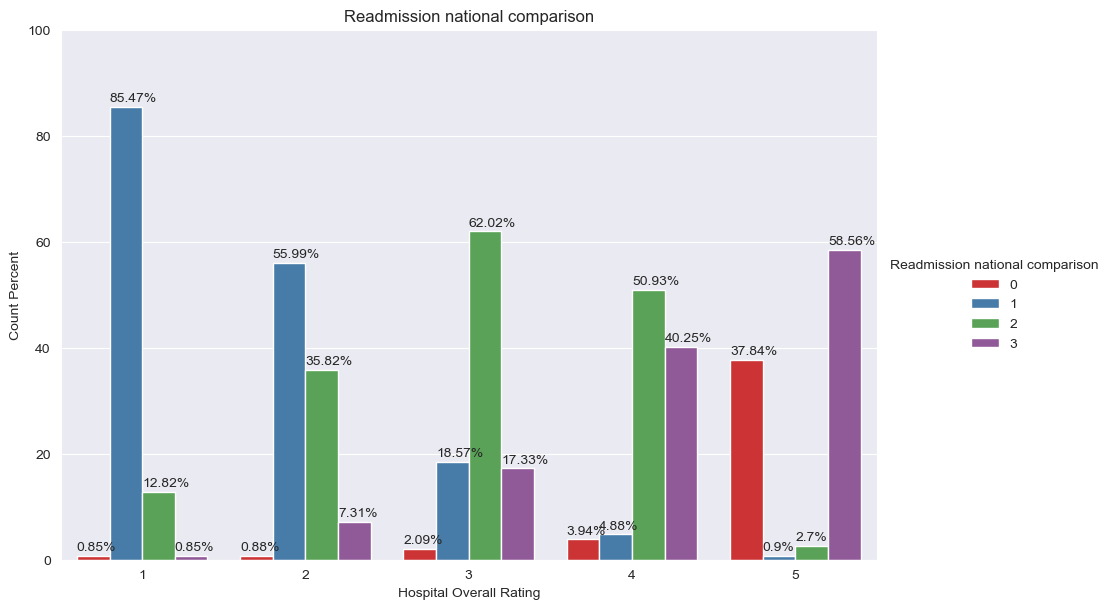

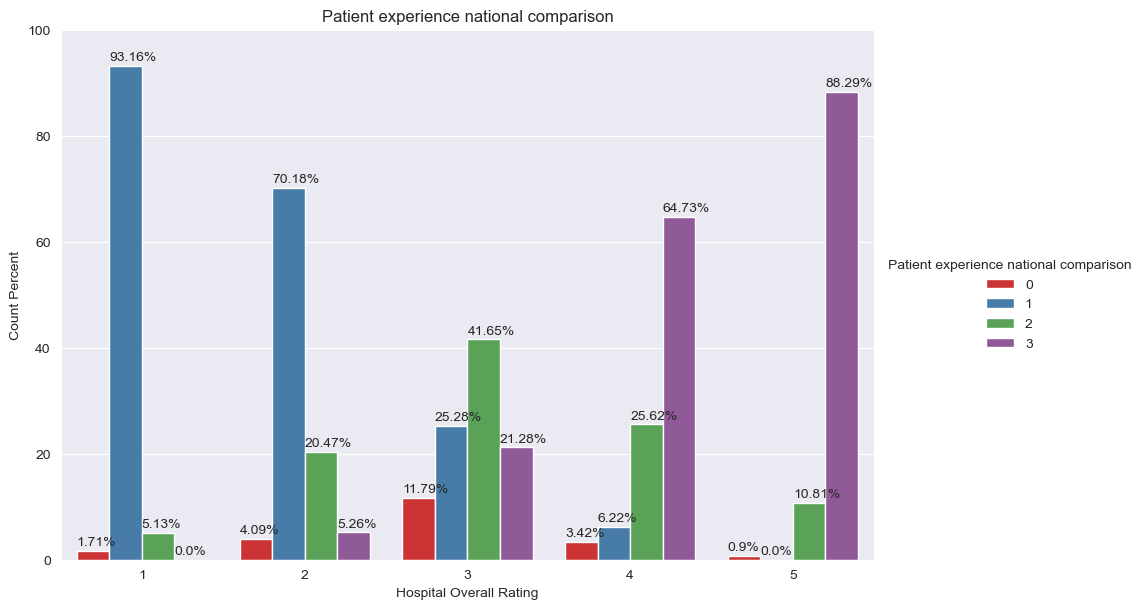

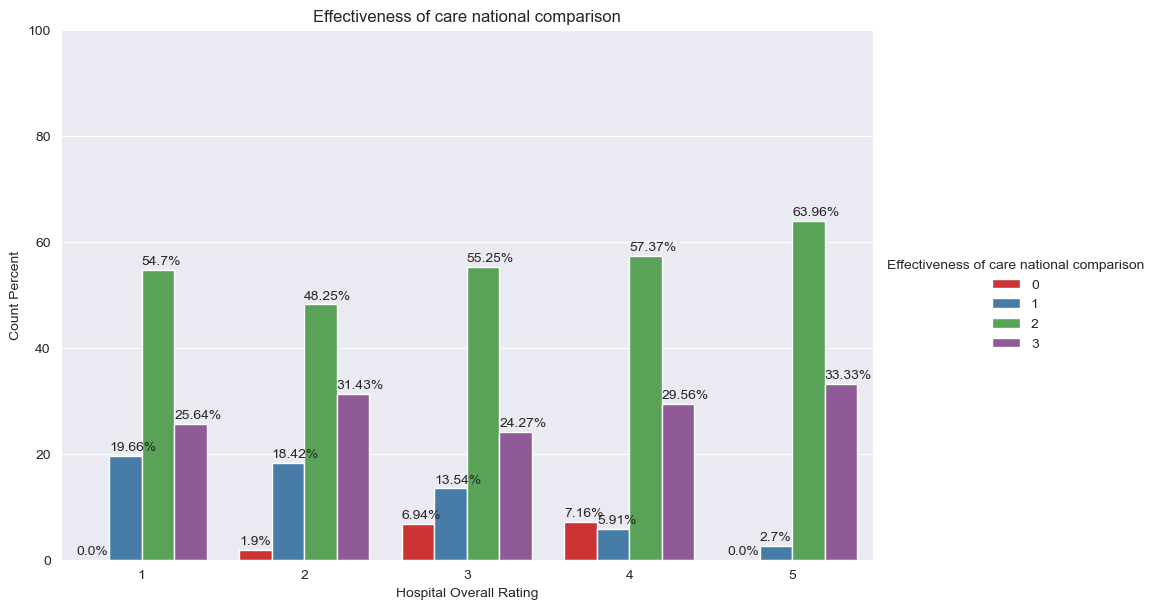

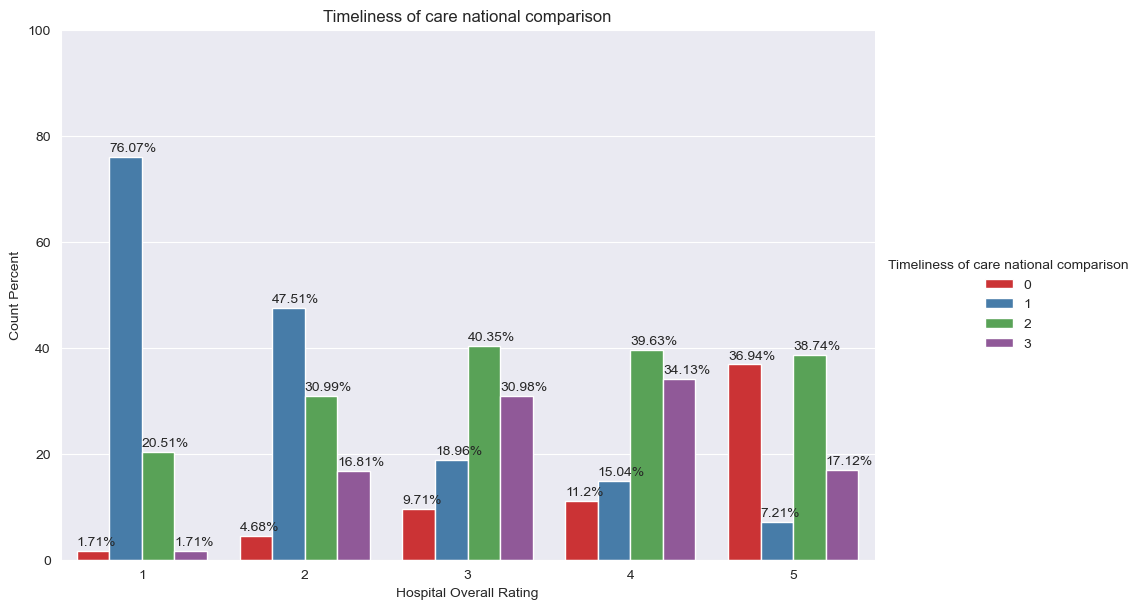

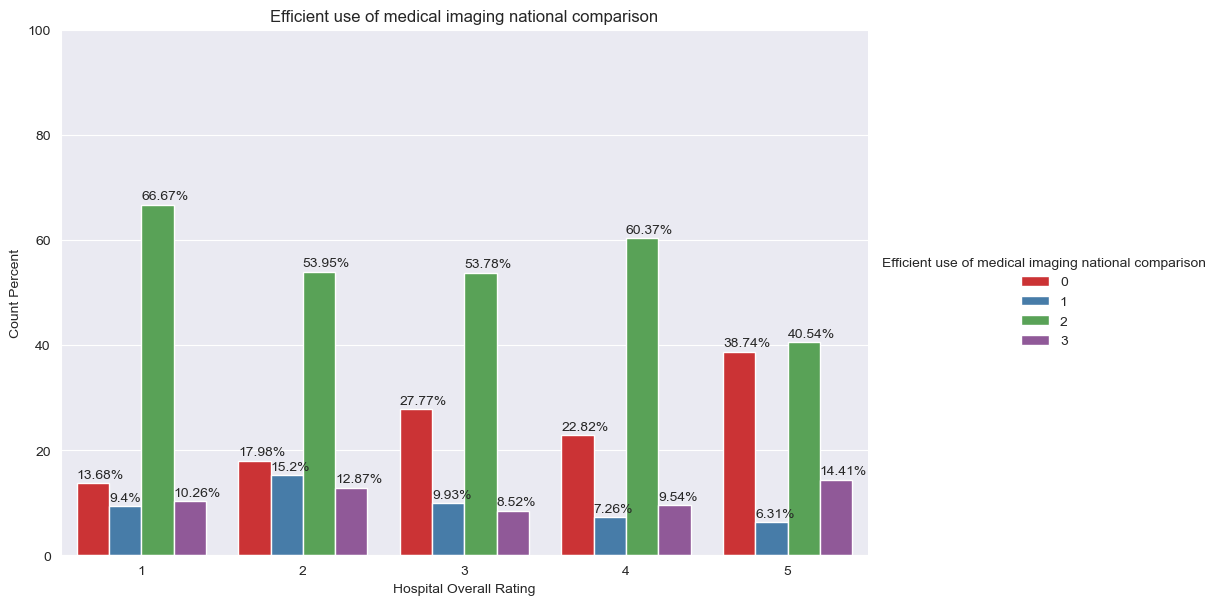

In [11]:
df = df_hgi.loc[df_hgi['Hospital overall rating'] != 'Not Available']

sns.set_style('darkgrid')
for k in comparison_filter:
    x,y = 'Hospital overall rating', k
    df1 = df.groupby(x)[y].value_counts(normalize=True)
    df1 = df1.mul(100) 
    df1 = df1.rename('percent').reset_index()

    gh = sns.catplot(x=x, y='percent', hue=y, kind='bar', data=df1, height=6, aspect=1.5, dodge=True,palette = 'Set1')
    gh.ax.set_ylim(0,100)
    gh.ax.set(xlabel = 'Hospital Overall Rating', ylabel = 'Count Percent')
    gh.ax.set_title(k)  
    for b in gh.ax.patches:
        txt_x = np.nan_to_num(b.get_x())
        y_val = np.nan_to_num(b.get_height())
        txt_y = y_val + 1
        txt = str(y_val.round(2)) + '%'
        gh.ax.text(txt_x,txt_y,txt)

plt.show()

### Observations:
* ##### Mortality Measures:
Approximately 29% of all 5-star hospitals have a Mortality measure greater than the National Average. Moreover, for 39% of all 5-star hospitals, the Mortality measures comparison is not available. These findings suggest that when available, 5-star hospitals tend to have higher Mortality measure scores.

* ##### Safety Measures: 
A notable 78% of 1-star hospitals have Safety scores below the National Average, while 64% of 5-star hospitals have Safety scores above the National Average. This indicates a strong correlation between higher Safety scores and better star ratings.

* ##### Readmission Score: 
Hospitals with 1 and 2 stars show a high percentage of scores below the National average, whereas 4 and 5-star hospitals exhibit a high percentage of scores above the National average for Readmission measures. These results underscore the significant impact of higher Readmission measures on star ratings.

* ##### Patient Experience: 
An impressive 65% of 4-star hospitals and a remarkable 89% of 5-star hospitals have Patient Experience scores above the National average, with none falling below. This clear pattern demonstrates that Patient Experience scores play a crucial role in determining star ratings.

* ##### Effectiveness Measures, Timeliness Measures, and Efficient Use of Imaging Measures: 
For these three measures, a substantial percentage of hospitals have scores similar to the National average. Additionally, there is little variation in ratings among hospitals for these measures. This aligns with the expectation that these measures contribute less to star ratings, as they are assigned a lower weightage of 4%.

In summary, these observations suggest that Mortality, Safety, Readmission, and Patient Experience measures have a significant impact on a hospital's star rating, while Effectiveness Measures, Timeliness Measures, and Efficient Use of Imaging Measures appear to have less influence, in line with their lower assigned weightage.


#### 1.3.4 Plot the Number of Hopitals by State. 

In [12]:
Total_state = pd.value_counts(df_hgi['State'])
Total_state = pd.DataFrame(Total_state)
Total_state = Total_state.reset_index()

Total_state.columns = ['State', 'Number of Hospitals']
Total_state.head()

,State,Number of Hospitals
0,TX,407
1,CA,345
2,FL,187
3,IL,179
4,NY,174


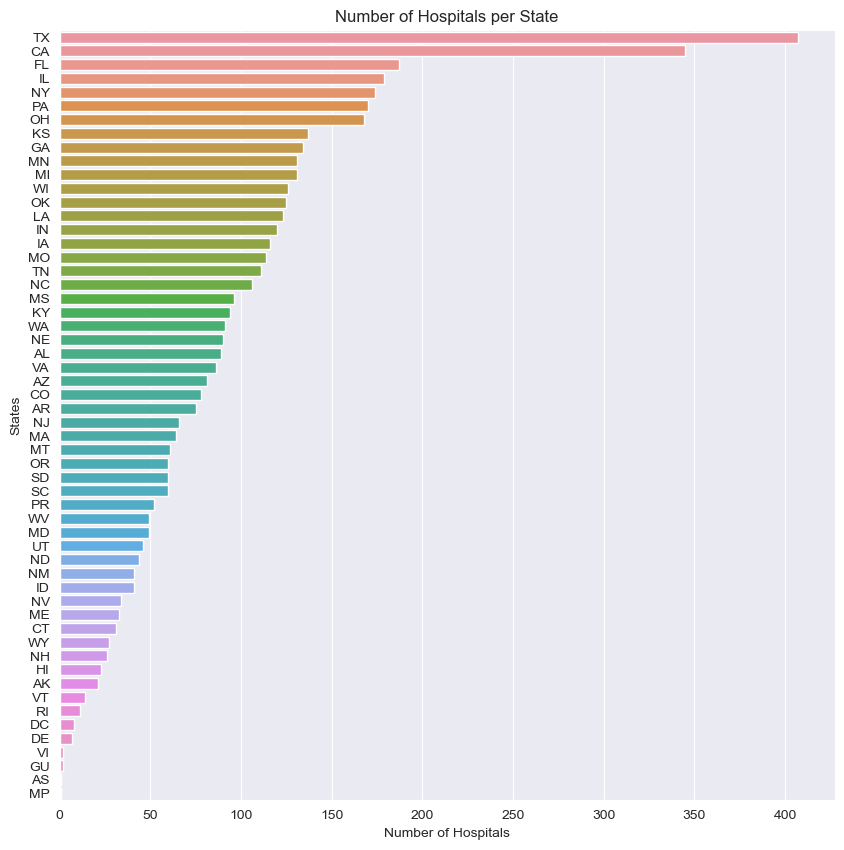

In [13]:
# Plot the number of Hospitals by State

plt.figure(figsize=(10, 10))
ax = sns.barplot(x='Number of Hospitals', y='State', data=Total_state,)
plt.xlabel('Number of Hospitals')
plt.ylabel('States')
plt.title('Number of Hospitals per State')
plt.show()

#### Observation:
Texas has a higher count of hospitals and then California. This information is valuable for understanding the healthcare infrastructure in these states.

#### 1.3.5 Plot the Number of Hopitals by Hospital Types.

In [14]:
Hospital_Type_df = pd.value_counts(df_hgi['Hospital Type'])
Hospital_Type_df = pd.DataFrame(Hospital_Type_df)
Hospital_Type_df = Hospital_Type_df.reset_index()
Hospital_Type_df.columns = ['Hospital Type', 'Number of Hospitals']
Hospital_Type_df.head()

,Hospital Type,Number of Hospitals
0,Acute Care Hospitals,3382
1,Critical Access Hospitals,1337
2,Childrens,99


Text(0.5, 1.0, 'Count of Types of Hospitals(Acute care/Critical Access/Childrens)')

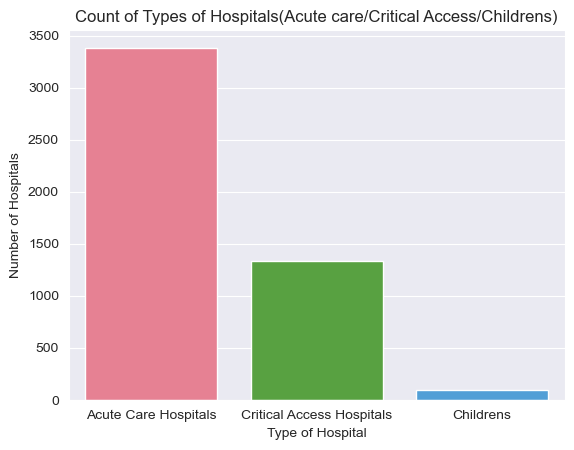

In [15]:
# Plot the number of Hospitals by Hospital Types

ax = sns.barplot(x = 'Hospital Type', y= 'Number of Hospitals', data = Hospital_Type_df,palette='husl')
ax.set(xlabel = 'Type of Hospital', ylabel = 'Number of Hospitals')
ax.set_title('Count of Types of Hospitals(Acute care/Critical Access/Childrens)')

#### Observation:
Majority of hospitals are acute care facilities, followed by critical access hospitals, while children's hospitals are relatively rare in comparison. This information can be valuable for healthcare planning and resource allocation.

#### 1.3.6 Plot Hospital Ownership Vs Average Hospital Rating 

In [16]:
rating_df = df
rating_df["Hospital overall rating"] = rating_df["Hospital overall rating"].astype("float32")
rating_df = rating_df[rating_df["Hospital Type"] == "Acute Care Hospitals"]
rating_df["Hospital Type"] = rating_df["Hospital Type"].astype("category")
print("Acute Care Hospitals:")
print (rating_df[["Hospital Type", "Hospital overall rating" , "Provider ID"]].groupby(["Hospital Type", "Hospital overall rating" ]).count())
print ("**********************************************************")
rating_df1 = df
rating_df1 = rating_df1[rating_df1["Hospital Type"] == "Critical Access Hospitals"]
rating_df1["Hospital Type"] = rating_df1["Hospital Type"].astype("category")
print('Critical Access Hospitals:')
print (rating_df1[["Hospital Type", "Hospital overall rating" , "Provider ID"]].groupby(["Hospital Type", "Hospital overall rating" ]).count())
print ("**********************************************************")
rating_df2 = df
rating_df2 = rating_df2[rating_df2["Hospital Type"] == "Childrens"]
rating_df2["Hospital Type"] = rating_df2["Hospital Type"].astype("category")
print('Childrens:')
print (rating_df2[["Hospital Type", "Hospital overall rating" , "Provider ID"]].groupby(["Hospital Type", "Hospital overall rating" ]).count())

Acute Care Hospitals:
                                              Provider ID
Hospital Type        Hospital overall rating             
Acute Care Hospitals 1.0                              117
                     2.0                              659
                     3.0                             1426
                     4.0                              749
                     5.0                              110
**********************************************************
Critical Access Hospitals:
                                                   Provider ID
Hospital Type             Hospital overall rating             
Critical Access Hospitals 2.0                               25
                          3.0                              346
                          4.0                              215
                          5.0                                1
**********************************************************
Childrens:
Empty DataFrame
Columns: [Provider ID]

#### Comment:  
Critical Access Hospitals have less data and for Children Hospital is not available; hence will consider only Hospital type acute care hospitals for further visualization.

In [17]:
# Ownership in Acute Care Hospitals
print (rating_df["Hospital Ownership"].value_counts())

Voluntary non-profit - Private                 1284
Proprietary                                     633
Voluntary non-profit - Other                    348
Voluntary non-profit - Church                   275
Government - Hospital District or Authority     261
Government - Local                              168
Government - State                               44
Physician                                        31
Government - Federal                             15
Tribal                                            2
Name: Hospital Ownership, dtype: int64


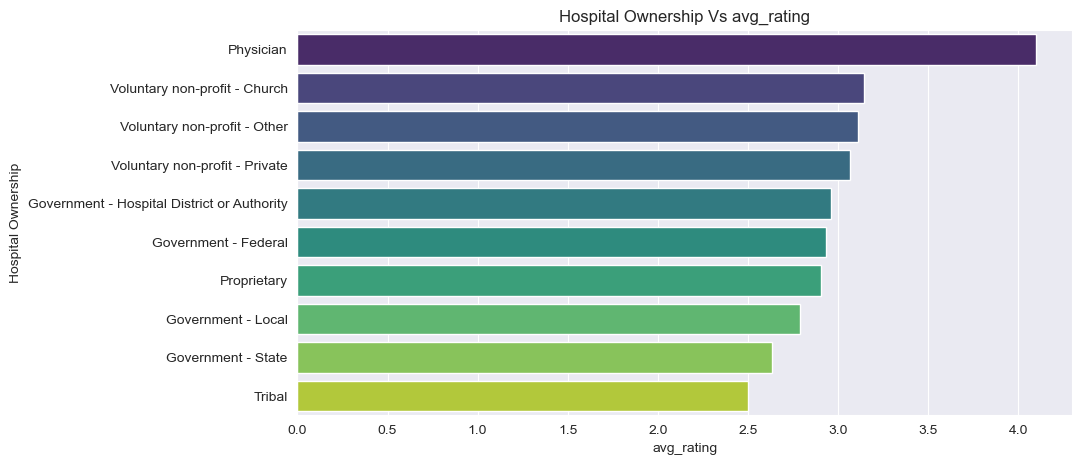

In [18]:
avg_rating_ownership = rating_df.groupby("Hospital Ownership" , as_index = False).agg({"Hospital overall rating":"mean", "Provider ID":"count"}).sort_values(["Hospital overall rating"] ,ascending=False)
avg_rating_ownership.columns = ["Hospital Ownership","avg_rating","count"]
# Data outcome visualization 
plt.figure(figsize=(10, 5))
sns.barplot(data=avg_rating_ownership, x="avg_rating", y="Hospital Ownership",palette="viridis")
plt.title('Hospital Ownership Vs avg_rating')
plt.show()

#### Observation:
The average rating(for Acute Care Hospitals type)  was found to be lower for hospitals under tribal and local government ownership, while higher ratings were consistently observed for hospitals owned by physicians and voluntary non-profit organizations, such as churches, private institutions etc.

#### 1.3.7 Plot the Distribution of Hospital Rating

In [19]:
df_hgi['Hospital overall rating'].unique()

array(['3', '2', 'Not Available', '4', '5', '1'], dtype=object)

In [20]:
Hospital_rating = df_hgi.drop(df_hgi[df_hgi['Hospital overall rating'] =='Not Available'].index)
Hospital_rating['Hospital overall rating'].unique()

array(['3', '2', '4', '5', '1'], dtype=object)

In [21]:
Hospital_rating = pd.value_counts(Hospital_rating['Hospital overall rating'])
Hospital_rating = pd.DataFrame(Hospital_rating)

Hospital_rating = Hospital_rating.reset_index()
Hospital_rating.columns = ['Hospital Rating', 'Number of Hospitals']
Hospital_rating.head()

,Hospital Rating,Number of Hospitals
0,3,1772
1,4,964
2,2,684
3,1,117
4,5,111


[Text(0.5, 0, 'Hospital Rating'), Text(0, 0.5, 'Number of Hospitals')]

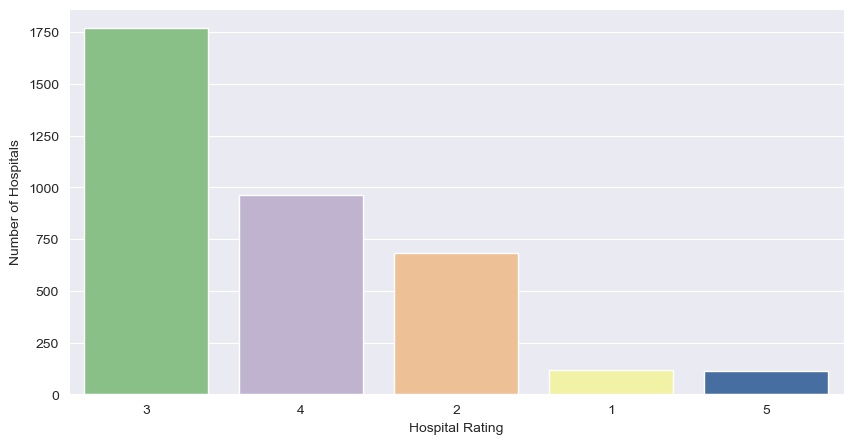

In [22]:
# Plot the Distribution of Hospital Rating

dims = (10, 5)
fig, ax = plt.subplots(figsize=dims)
ax = sns.barplot(x = 'Hospital Rating', y = 'Number of Hospitals', palette='Accent',data = Hospital_rating)
ax.set(xlabel = 'Hospital Rating', ylabel = 'Number of Hospitals')

#### Observations: 

Most Hospitals Are Rated 3: The rating "3" has the highest count of hospitals falling into this category. This suggests that the majority of hospitals in the dataset have received a rating of 3. This could indicate that a significant proportion of hospitals are considered average in terms of their overall quality or performance. 

## <span style="color:brown"> 2. Data Merging and Master Data creation

#### Creating a Master dataset to merge all the required table data into one
The Hospital General Information Dataset is considered as the master and the other datasets are merged with this. 


###  <span style="color:brown"> 2.1 Copy Hospital General information to master and pre-process 

In [23]:
# Create a Main dataset to merge all the required table data into one

df_main = df_hgi.copy()

In [24]:
df_main.head(3)

,Provider ID,Hospital Name,Address,City,State,ZIP Code,County Name,Phone Number,Hospital Type,Hospital Ownership,Emergency Services,Meets criteria for meaningful use of EHRs,Hospital overall rating,Mortality national comparison,Safety of care national comparison,Readmission national comparison,Patient experience national comparison,Effectiveness of care national comparison,Timeliness of care national comparison,Efficient use of medical imaging national comparison
0,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,Acute Care Hospitals,Government - Hospital District or Authority,Yes,Y,3,2,3,2,1,2,2,2
1,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,MARSHALL,2565938310,Acute Care Hospitals,Government - Hospital District or Authority,Yes,Y,3,1,2,3,2,2,3,1
2,10006,ELIZA COFFEE MEMORIAL HOSPITAL,205 MARENGO STREET,FLORENCE,AL,35631,LAUDERDALE,2567688400,Acute Care Hospitals,Government - Hospital District or Authority,Yes,Y,2,1,2,2,1,2,3,2


In [25]:
df_main.columns

Index(['Provider ID', 'Hospital Name', 'Address', 'City', 'State', 'ZIP Code',
       'County Name', 'Phone Number', 'Hospital Type', 'Hospital Ownership',
       'Emergency Services', 'Meets criteria for meaningful use of EHRs',
       'Hospital overall rating', 'Mortality national comparison',
       'Safety of care national comparison', 'Readmission national comparison',
       'Patient experience national comparison',
       'Effectiveness of care national comparison',
       'Timeliness of care national comparison',
       'Efficient use of medical imaging national comparison'],
      dtype='object')

In [26]:
# Drop columns from master dataset that are not needed for analysis

drop_cols = ['Hospital Name', 'Address', 'City', 'State', 'ZIP Code',
       'County Name', 'Phone Number', 'Hospital Type', 'Hospital Ownership']

df_main = df_main.drop(drop_cols, axis=1)
df_main.head(3)

,Provider ID,Emergency Services,Meets criteria for meaningful use of EHRs,Hospital overall rating,Mortality national comparison,Safety of care national comparison,Readmission national comparison,Patient experience national comparison,Effectiveness of care national comparison,Timeliness of care national comparison,Efficient use of medical imaging national comparison
0,10001,Yes,Y,3,2,3,2,1,2,2,2
1,10005,Yes,Y,3,1,2,3,2,2,3,1
2,10006,Yes,Y,2,1,2,2,1,2,3,2


###  <span style="color:brown"> 2.2 Create a function to merge the records: 

In [27]:
# Create a function to merge the records: 

def merge_df_measures(df_main, df, cols, prefix):
    for k in cols:
        df_Temp = df[df["Measure ID"]==k]
  
        # Strip two important columns.
        df_Temp = pd.DataFrame({'Provider ID':df_Temp["Provider ID"], prefix+k:df_Temp.Score.astype('float')})
        df_main = pd.merge(left=df_main, right=df_Temp, left_on='Provider ID',right_on='Provider ID', how='outer')
    return df_main

###  <span style="color:brown"> 2.3 Merge Mortality Measures to Master dataset

In [28]:
df_mort = pd.read_csv('Readmissions and Deaths - Hospital.csv')
df_mort['Score'] = df_mort['Score'].apply(pd.to_numeric, args=('coerce',))
df_mort.head()

,Provider ID,Hospital Name,Address,City,State,ZIP Code,County Name,Phone Number,Measure Name,Measure ID,Compared to National,Denominator,Score,Lower Estimate,Higher Estimate,Footnote,Measure Start Date,Measure End Date
0,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,Acute Myocardial Infarction (AMI) 30-Day Morta...,MORT_30_AMI,No Different than the National Rate,733,12.5,10.6,14.9,NaN,07/01/2012,06/30/2015
1,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,Death rate for CABG,MORT_30_CABG,No Different than the National Rate,278,4.2,2.6,6.8,NaN,07/01/2012,06/30/2015
2,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,Death rate for chronic obstructive pulmonary d...,MORT_30_COPD,No Different than the National Rate,586,9.3,7.3,11.8,NaN,07/01/2012,06/30/2015
3,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,Heart failure (HF) 30-Day Mortality Rate,MORT_30_HF,No Different than the National Rate,797,12.4,10.4,14.6,NaN,07/01/2012,06/30/2015
4,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,Pneumonia (PN) 30-Day Mortality Rate,MORT_30_PN,No Different than the National Rate,599,15.5,13.0,18.5,NaN,07/01/2012,06/30/2015


In [29]:
df_mort.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67452 entries, 0 to 67451
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Provider ID           67452 non-null  int64  
 1   Hospital Name         67452 non-null  object 
 2   Address               67452 non-null  object 
 3   City                  67452 non-null  object 
 4   State                 67452 non-null  object 
 5   ZIP Code              67452 non-null  int64  
 6   County Name           67242 non-null  object 
 7   Phone Number          67452 non-null  int64  
 8   Measure Name          67452 non-null  object 
 9   Measure ID            67452 non-null  object 
 10  Compared to National  67452 non-null  object 
 11  Denominator           67452 non-null  object 
 12  Score                 41710 non-null  float64
 13  Lower Estimate        67452 non-null  object 
 14  Higher Estimate       67452 non-null  object 
 15  Footnote           

In [30]:
df_mort.shape

(67452, 18)

In [31]:
print (len(df_mort["Measure ID"].unique()))

# Uncomment for analysis
print (df_mort["Measure ID"].unique())

14
['MORT_30_AMI' 'MORT_30_CABG' 'MORT_30_COPD' 'MORT_30_HF' 'MORT_30_PN'
 'MORT_30_STK' 'READM_30_AMI' 'READM_30_CABG' 'READM_30_COPD'
 'READM_30_HF' 'READM_30_HIP_KNEE' 'READM_30_HOSP_WIDE' 'READM_30_PN'
 'READM_30_STK']


In [32]:
mort_grp_cols = ['MORT_30_AMI', 'MORT_30_CABG', 'MORT_30_COPD', 'MORT_30_HF', 'MORT_30_PN', 'MORT_30_STK']
print (mort_grp_cols)

['MORT_30_AMI', 'MORT_30_CABG', 'MORT_30_COPD', 'MORT_30_HF', 'MORT_30_PN', 'MORT_30_STK']


#### 2.3.1 Measures decription for Mortality measures from Readmissions and Deaths – Hospital.csv data sheet

In [33]:
# pd.set_option('display.max_colwidth', None)
df_data_Dict1 = df_mort.groupby(["Measure ID","Measure Name" ]).size().to_frame('size').reset_index()
df_data_Dict1 = df_data_Dict1[df_data_Dict1["Measure ID"].isin(mort_grp_cols)]
df_data_Dict1["Measure ID"] = 'Mortality_' + df_data_Dict1["Measure ID"].astype(str)
df_data_Dict1.head()

,Measure ID,Measure Name,size
0,Mortality_MORT_30_AMI,Acute Myocardial Infarction (AMI) 30-Day Morta...,4818
1,Mortality_MORT_30_CABG,Death rate for CABG,4818
2,Mortality_MORT_30_COPD,Death rate for chronic obstructive pulmonary d...,4818
3,Mortality_MORT_30_HF,Heart failure (HF) 30-Day Mortality Rate,4818
4,Mortality_MORT_30_PN,Pneumonia (PN) 30-Day Mortality Rate,4818


#### 2.3.2 Merge Mortality measures from Readmissions and Deaths – Hospital.csv data sheet

In [34]:
# Merge Mortality measures from Readmissions and Deaths – Hospital.csv data sheet
df_main = merge_df_measures(df_main, df_mort, mort_grp_cols, 'Mortality_')
df_main.head(3)

,Provider ID,Emergency Services,Meets criteria for meaningful use of EHRs,Hospital overall rating,Mortality national comparison,Safety of care national comparison,Readmission national comparison,Patient experience national comparison,Effectiveness of care national comparison,Timeliness of care national comparison,Efficient use of medical imaging national comparison,Mortality_MORT_30_AMI,Mortality_MORT_30_CABG,Mortality_MORT_30_COPD,Mortality_MORT_30_HF,Mortality_MORT_30_PN,Mortality_MORT_30_STK
0,10001,Yes,Y,3,2,3,2,1,2,2,2,12.5,4.2,9.3,12.4,15.5,15.4
1,10005,Yes,Y,3,1,2,3,2,2,3,1,16.0,NaN,7.6,15.5,20.8,15.5
2,10006,Yes,Y,2,1,2,2,1,2,3,2,16.7,4.1,7.1,15.6,18.2,17.9


#### 2.3.3 Merge Mortality measures from Complications - Hospital.csv data sheet

In [35]:
df_compl = pd.read_csv('Complications - Hospital.csv')
df_compl['Score'] = df_compl['Score'].apply(pd.to_numeric, args=('coerce',))
df_compl.head(3)

,Provider ID,Hospital Name,Address,City,State,ZIP Code,County Name,Phone Number,Measure Name,Measure ID,Compared to National,Denominator,Score,Lower Estimate,Higher Estimate,Footnote,Measure Start Date,Measure End Date
0,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,Rate of complications for hip/knee replacement...,COMP_HIP_KNEE,No Different than the National Rate,331,3.80,2.6,5.5,NaN,04/01/2012,03/31/2015
1,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,Serious blood clots after surgery,PSI_12_POSTOP_PULMEMB_DVT,No Different than the National Rate,4549,3.32,1.25,5.38,NaN,07/01/2013,06/30/2015
2,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,Blood stream infection after surgery,PSI_13_POST_SEPSIS,No Different than the National Rate,578,5.72,0.00,11.48,NaN,07/01/2013,06/30/2015


In [36]:
df_data_Dict2 = df_compl.groupby(['Measure ID', 'Measure Name']).size().to_frame('size').reset_index()
df_data_Dict2 = df_data_Dict2[df_data_Dict2['Measure ID'] == 'PSI_4_SURG_COMP']
df_data_Dict2['Measure ID'] = 'Mortality_' + df_data_Dict2['Measure ID'].astype(str)
df_data_Dict2

,Measure ID,Measure Name,size
6,Mortality_PSI_4_SURG_COMP,Deaths among Patients with Serious Treatable C...,4818


In [37]:
#### Merge Mortality measures from Complications - Hospital.csv data sheet
compl_cols = ['PSI_4_SURG_COMP']
df_main = merge_df_measures(df_main, df_compl, compl_cols, 'Mortality_')
df_main.head(3)

,Provider ID,Emergency Services,Meets criteria for meaningful use of EHRs,Hospital overall rating,Mortality national comparison,Safety of care national comparison,Readmission national comparison,Patient experience national comparison,Effectiveness of care national comparison,Timeliness of care national comparison,Efficient use of medical imaging national comparison,Mortality_MORT_30_AMI,Mortality_MORT_30_CABG,Mortality_MORT_30_COPD,Mortality_MORT_30_HF,Mortality_MORT_30_PN,Mortality_MORT_30_STK,Mortality_PSI_4_SURG_COMP
0,10001,Yes,Y,3,2,3,2,1,2,2,2,12.5,4.2,9.3,12.4,15.5,15.4,168.26
1,10005,Yes,Y,3,1,2,3,2,2,3,1,16.0,NaN,7.6,15.5,20.8,15.5,179.05
2,10006,Yes,Y,2,1,2,2,1,2,3,2,16.7,4.1,7.1,15.6,18.2,17.9,198.33


###  <span style="color:brown"> 2.4 Merge Safety Measures with Master Data

In [38]:
df_hai = pd.read_csv('Healthcare Associated Infections - Hospital.csv')
df_hai['Score'] = df_hai['Score'].apply(pd.to_numeric, args=('coerce',))
df_hai.head(3)

,Provider ID,Hospital Name,Address,City,State,ZIP Code,County Name,Phone Number,Measure Name,Measure ID,Compared to National,Score,Footnote,Measure Start Date,Measure End Date
0,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,CLABSI: Lower Confidence Limit,HAI_1_CI_LOWER,NaN,1.030,NaN,1/1/2015,12/31/2015
1,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,CLABSI: Upper Confidence Limit,HAI_1_CI_UPPER,NaN,2.765,NaN,1/1/2015,12/31/2015
2,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,CLABSI: Number of Device Days,HAI_1_DOPC_DAYS,NaN,7117.000,NaN,1/1/2015,12/31/2015


In [39]:
df_hai.shape

(231264, 15)

In [40]:
df_hai.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 231264 entries, 0 to 231263
Data columns (total 15 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Provider ID           231264 non-null  int64  
 1   Hospital Name         231264 non-null  object 
 2   Address               231264 non-null  object 
 3   City                  231264 non-null  object 
 4   State                 231264 non-null  object 
 5   ZIP Code              231264 non-null  int64  
 6   County Name           230544 non-null  object 
 7   Phone Number          231264 non-null  int64  
 8   Measure Name          231264 non-null  object 
 9   Measure ID            231264 non-null  object 
 10  Compared to National  38544 non-null   object 
 11  Score                 129378 non-null  float64
 12  Footnote              103373 non-null  object 
 13  Measure Start Date    231264 non-null  object 
 14  Measure End Date      231264 non-null  object 
dtype

In [41]:
print(len(df_hai["Measure ID"].unique()))
print (df_hai["Measure ID"].unique())

48
['HAI_1_CI_LOWER' 'HAI_1_CI_UPPER' 'HAI_1_DOPC_DAYS' 'HAI_1_ELIGCASES'
 'HAI_1_NUMERATOR' 'HAI_1_SIR' 'HAI_1a_CI_LOWER' 'HAI_1a_CI_UPPER'
 'HAI_1a_DOPC_DAYS' 'HAI_1a_ELIGCASES' 'HAI_1a_NUMERATOR' 'HAI_1a_SIR'
 'HAI_2_CI_LOWER' 'HAI_2_CI_UPPER' 'HAI_2_DOPC_DAYS' 'HAI_2_ELIGCASES'
 'HAI_2_NUMERATOR' 'HAI_2_SIR' 'HAI_2a_CI_LOWER' 'HAI_2a_CI_UPPER'
 'HAI_2a_DOPC_DAYS' 'HAI_2a_ELIGCASES' 'HAI_2a_NUMERATOR' 'HAI_2a_SIR'
 'HAI_3_CI_LOWER' 'HAI_3_CI_UPPER' 'HAI_3_DOPC_DAYS' 'HAI_3_ELIGCASES'
 'HAI_3_NUMERATOR' 'HAI_3_SIR' 'HAI_4_CI_LOWER' 'HAI_4_CI_UPPER'
 'HAI_4_DOPC_DAYS' 'HAI_4_ELIGCASES' 'HAI_4_NUMERATOR' 'HAI_4_SIR'
 'HAI_5_CI_LOWER' 'HAI_5_CI_UPPER' 'HAI_5_DOPC_DAYS' 'HAI_5_ELIGCASES'
 'HAI_5_NUMERATOR' 'HAI_5_SIR' 'HAI_6_CI_LOWER' 'HAI_6_CI_UPPER'
 'HAI_6_DOPC_DAYS' 'HAI_6_ELIGCASES' 'HAI_6_NUMERATOR' 'HAI_6_SIR']


In [42]:
hai_grp_cols = ['HAI_1_SIR', 'HAI_1a_SIR', 'HAI_2_SIR', 'HAI_2a_SIR', 
               'HAI_3_SIR', 'HAI_4_SIR', 'HAI_5_SIR', 'HAI_6_SIR' ]

print (hai_grp_cols)

['HAI_1_SIR', 'HAI_1a_SIR', 'HAI_2_SIR', 'HAI_2a_SIR', 'HAI_3_SIR', 'HAI_4_SIR', 'HAI_5_SIR', 'HAI_6_SIR']


In [43]:
df_data_Dict3 = df_hai.groupby(['Measure ID', 'Measure Name']).size().to_frame('size').reset_index()
df_data_Dict3 = df_data_Dict3[df_data_Dict3['Measure ID'].isin(hai_grp_cols)]
df_data_Dict3['Measure ID'] = 'Safety_' + df_data_Dict3['Measure ID'].astype(str)
df_data_Dict3.head()

,Measure ID,Measure Name,size
5,Safety_HAI_1_SIR,Central line-associated bloodstream infections...,4818
11,Safety_HAI_1a_SIR,Central line-associated blood stream infection...,4818
17,Safety_HAI_2_SIR,Catheter-associated urinary tract infections (...,4818
23,Safety_HAI_2a_SIR,Catheter-Associated Urinary Tract Infections (...,4818
29,Safety_HAI_3_SIR,Surgical Site Infection from colon surgery (SS...,4818


#### 2.4.1 Merge Safety features from Healthcare Associated Infections - Hospital.csv data sheet

In [44]:
# Merge hai features from Healthcare Associated Infections - Hospital.csv data sheet

df_main = merge_df_measures(df_main, df_hai, hai_grp_cols, 'Safety_')
df_main.head(3)

,Provider ID,Emergency Services,Meets criteria for meaningful use of EHRs,Hospital overall rating,Mortality national comparison,Safety of care national comparison,Readmission national comparison,Patient experience national comparison,Effectiveness of care national comparison,Timeliness of care national comparison,Efficient use of medical imaging national comparison,Mortality_MORT_30_AMI,Mortality_MORT_30_CABG,Mortality_MORT_30_COPD,Mortality_MORT_30_HF,Mortality_MORT_30_PN,Mortality_MORT_30_STK,Mortality_PSI_4_SURG_COMP,Safety_HAI_1_SIR,Safety_HAI_1a_SIR,Safety_HAI_2_SIR,Safety_HAI_2a_SIR,Safety_HAI_3_SIR,Safety_HAI_4_SIR,Safety_HAI_5_SIR,Safety_HAI_6_SIR
0,10001,Yes,Y,3,2,3,2,1,2,2,2,12.5,4.2,9.3,12.4,15.5,15.4,168.26,1.740,2.433,1.427,2.307,1.870,0.0,0.422,0.787
1,10005,Yes,Y,3,1,2,3,2,2,3,1,16.0,NaN,7.6,15.5,20.8,15.5,179.05,1.062,0.648,0.456,0.698,0.386,NaN,1.388,0.405
2,10006,Yes,Y,2,1,2,2,1,2,3,2,16.7,4.1,7.1,15.6,18.2,17.9,198.33,0.341,0.443,0.641,0.801,0.310,NaN,1.261,0.513


#### 2.4.2 Merge Safety features from Complications - Hospital.csv data sheet

In [45]:
print (df_compl["Measure ID"].unique())

['COMP_HIP_KNEE' 'PSI_12_POSTOP_PULMEMB_DVT' 'PSI_13_POST_SEPSIS'
 'PSI_14_POSTOP_DEHIS' 'PSI_15_ACC_LAC' 'PSI_3_ULCER' 'PSI_4_SURG_COMP'
 'PSI_6_IAT_PTX' 'PSI_7_CVCBI' 'PSI_8_POST_HIP' 'PSI_90_SAFETY']


In [46]:
# Add the remaining Safety features from the Complications Sheet
compl_cols1 = ['COMP_HIP_KNEE', 'PSI_90_SAFETY']

df_main = merge_df_measures(df_main, df_compl, compl_cols1, 'Safety_')
df_main.head(3)

,Provider ID,Emergency Services,Meets criteria for meaningful use of EHRs,Hospital overall rating,Mortality national comparison,Safety of care national comparison,Readmission national comparison,Patient experience national comparison,Effectiveness of care national comparison,Timeliness of care national comparison,Efficient use of medical imaging national comparison,Mortality_MORT_30_AMI,Mortality_MORT_30_CABG,Mortality_MORT_30_COPD,Mortality_MORT_30_HF,Mortality_MORT_30_PN,Mortality_MORT_30_STK,Mortality_PSI_4_SURG_COMP,Safety_HAI_1_SIR,Safety_HAI_1a_SIR,Safety_HAI_2_SIR,Safety_HAI_2a_SIR,Safety_HAI_3_SIR,Safety_HAI_4_SIR,Safety_HAI_5_SIR,Safety_HAI_6_SIR,Safety_COMP_HIP_KNEE,Safety_PSI_90_SAFETY
0,10001,Yes,Y,3,2,3,2,1,2,2,2,12.5,4.2,9.3,12.4,15.5,15.4,168.26,1.740,2.433,1.427,2.307,1.870,0.0,0.422,0.787,3.8,0.68
1,10005,Yes,Y,3,1,2,3,2,2,3,1,16.0,NaN,7.6,15.5,20.8,15.5,179.05,1.062,0.648,0.456,0.698,0.386,NaN,1.388,0.405,3.0,0.85
2,10006,Yes,Y,2,1,2,2,1,2,3,2,16.7,4.1,7.1,15.6,18.2,17.9,198.33,0.341,0.443,0.641,0.801,0.310,NaN,1.261,0.513,3.8,0.91


In [47]:
# pd.set_option('display.max_colwidth', None)
df_data_Dict4 = df_compl.groupby(["Measure ID", 'Measure Name']).size().to_frame('size').reset_index()
df_data_Dict4 = df_data_Dict4[df_data_Dict4["Measure ID"].isin(['COMP_HIP_KNEE', 'PSI_90_SAFETY'])]
df_data_Dict4["Measure ID"] = 'Safety_' + df_data_Dict4["Measure ID"].astype(str)
df_data_Dict4

,Measure ID,Measure Name,size
0,Safety_COMP_HIP_KNEE,Rate of complications for hip/knee replacement...,4818
10,Safety_PSI_90_SAFETY,Serious complications,4818


###  <span style="color:brown"> 2.5 Merge Readmission data

In [48]:
print (len(df_mort["Measure ID"].unique()))
print (df_mort["Measure ID"].unique())

14
['MORT_30_AMI' 'MORT_30_CABG' 'MORT_30_COPD' 'MORT_30_HF' 'MORT_30_PN'
 'MORT_30_STK' 'READM_30_AMI' 'READM_30_CABG' 'READM_30_COPD'
 'READM_30_HF' 'READM_30_HIP_KNEE' 'READM_30_HOSP_WIDE' 'READM_30_PN'
 'READM_30_STK']


In [49]:
readmmi_grp_cols = ['READM_30_AMI', 'READM_30_CABG',
                'READM_30_COPD', 'READM_30_HF', 'READM_30_HIP_KNEE',
                'READM_30_HOSP_WIDE', 'READM_30_PN', 'READM_30_STK']
print (readmmi_grp_cols)

['READM_30_AMI', 'READM_30_CABG', 'READM_30_COPD', 'READM_30_HF', 'READM_30_HIP_KNEE', 'READM_30_HOSP_WIDE', 'READM_30_PN', 'READM_30_STK']


#### 2.5.1 Merge Readmission features from Readmissions and Deaths – Hospital.csv data sheet

In [50]:
#### Merge Readmission features from Readmissions and Deaths – Hospital.csv data sheet

df_main = merge_df_measures(df_main, df_mort, readmmi_grp_cols, '')
df_main.head(3)

,Provider ID,Emergency Services,Meets criteria for meaningful use of EHRs,Hospital overall rating,Mortality national comparison,Safety of care national comparison,Readmission national comparison,Patient experience national comparison,Effectiveness of care national comparison,Timeliness of care national comparison,Efficient use of medical imaging national comparison,Mortality_MORT_30_AMI,Mortality_MORT_30_CABG,Mortality_MORT_30_COPD,Mortality_MORT_30_HF,Mortality_MORT_30_PN,Mortality_MORT_30_STK,Mortality_PSI_4_SURG_COMP,Safety_HAI_1_SIR,Safety_HAI_1a_SIR,Safety_HAI_2_SIR,Safety_HAI_2a_SIR,Safety_HAI_3_SIR,Safety_HAI_4_SIR,Safety_HAI_5_SIR,Safety_HAI_6_SIR,Safety_COMP_HIP_KNEE,Safety_PSI_90_SAFETY,READM_30_AMI,READM_30_CABG,READM_30_COPD,READM_30_HF,READM_30_HIP_KNEE,READM_30_HOSP_WIDE,READM_30_PN,READM_30_STK
0,10001,Yes,Y,3,2,3,2,1,2,2,2,12.5,4.2,9.3,12.4,15.5,15.4,168.26,1.740,2.433,1.427,2.307,1.870,0.0,0.422,0.787,3.8,0.68,16.5,15.1,21.1,21.4,5.1,15.4,18.7,12.7
1,10005,Yes,Y,3,1,2,3,2,2,3,1,16.0,NaN,7.6,15.5,20.8,15.5,179.05,1.062,0.648,0.456,0.698,0.386,NaN,1.388,0.405,3.0,0.85,16.7,NaN,18.0,21.9,5.7,14.9,16.4,13.4
2,10006,Yes,Y,2,1,2,2,1,2,3,2,16.7,4.1,7.1,15.6,18.2,17.9,198.33,0.341,0.443,0.641,0.801,0.310,NaN,1.261,0.513,3.8,0.91,16.1,15.2,19.8,20.6,5.0,15.4,17.9,12.0


In [51]:
df_data_Dict5 = df_mort.groupby(["Measure ID", 'Measure Name']).size().to_frame('size').reset_index()
df_data_Dict5 = df_data_Dict5[df_data_Dict5["Measure ID"].isin(readmmi_grp_cols)]
df_data_Dict5.head()

,Measure ID,Measure Name,size
6,READM_30_AMI,Acute Myocardial Infarction (AMI) 30-Day Readm...,4818
7,READM_30_CABG,Rate of readmission for CABG,4818
8,READM_30_COPD,Rate of readmission for chronic obstructive pu...,4818
9,READM_30_HF,Heart failure (HF) 30-Day Readmission Rate,4818
10,READM_30_HIP_KNEE,Rate of readmission after hip/knee replacement,4818


###  <span style="color:brown"> 2.6 Merge HCAHPS data

In [52]:
df_hcahps = pd.read_csv('HCAHPS - Hospital.csv', encoding = 'unicode_escape')
df_hcahps['HCAHPS Linear Mean Value'] = df_hcahps['HCAHPS Linear Mean Value'].apply(pd.to_numeric, args=('coerce',))
df_hcahps.head(3)

,Provider ID,Hospital Name,Address,City,State,ZIP Code,County Name,Phone Number,HCAHPS Measure ID,HCAHPS Question,HCAHPS Answer Description,Patient Survey Star Rating,Patient Survey Star Rating Footnote,HCAHPS Answer Percent,HCAHPS Answer Percent Footnote,HCAHPS Linear Mean Value,Number of Completed Surveys,Number of Completed Surveys Footnote,Survey Response Rate Percent,Survey Response Rate Percent Footnote,Measure Start Date,Measure End Date
0,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,H_STAR_RATING,Summary star rating,Summary star rating,3,NaN,Not Applicable,NaN,NaN,1194,NaN,27,NaN,01/01/2015,12/31/2015
1,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,H_CLEAN_HSP_A_P,Patients who reported that their room and bath...,"Room was ""always"" clean",Not Applicable,NaN,66,NaN,NaN,1194,NaN,27,NaN,01/01/2015,12/31/2015
2,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,H_CLEAN_HSP_SN_P,Patients who reported that their room and bath...,"Room was ""sometimes"" or ""never"" clean",Not Applicable,NaN,12,NaN,NaN,1194,NaN,27,NaN,01/01/2015,12/31/2015


In [53]:
df_hcahps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264990 entries, 0 to 264989
Data columns (total 22 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   Provider ID                            264990 non-null  int64  
 1   Hospital Name                          264990 non-null  object 
 2   Address                                264990 non-null  object 
 3   City                                   264990 non-null  object 
 4   State                                  264990 non-null  object 
 5   ZIP Code                               264990 non-null  int64  
 6   County Name                            264165 non-null  object 
 7   Phone Number                           264990 non-null  int64  
 8   HCAHPS Measure ID                      264990 non-null  object 
 9   HCAHPS Question                        264990 non-null  object 
 10  HCAHPS Answer Description              264990 non-null  

In [54]:
df_hcahps.shape

(264990, 22)

In [55]:
df_hcahps.columns

Index(['Provider ID', 'Hospital Name', 'Address', 'City', 'State', 'ZIP Code',
       'County Name', 'Phone Number', 'HCAHPS Measure ID', 'HCAHPS Question',
       'HCAHPS Answer Description', 'Patient Survey Star Rating',
       'Patient Survey Star Rating Footnote', 'HCAHPS Answer Percent',
       'HCAHPS Answer Percent Footnote', 'HCAHPS Linear Mean Value',
       'Number of Completed Surveys', 'Number of Completed Surveys Footnote',
       'Survey Response Rate Percent', 'Survey Response Rate Percent Footnote',
       'Measure Start Date', 'Measure End Date'],
      dtype='object')

In [56]:
print(len(df_hcahps["HCAHPS Measure ID"].unique()))
print (df_hcahps["HCAHPS Measure ID"].unique())

55
['H_STAR_RATING' 'H_CLEAN_HSP_A_P' 'H_CLEAN_HSP_SN_P' 'H_CLEAN_HSP_U_P'
 'H_CLEAN_LINEAR_SCORE' 'H_CLEAN_STAR_RATING' 'H_COMP_1_A_P'
 'H_COMP_1_LINEAR_SCORE' 'H_COMP_1_SN_P' 'H_COMP_1_STAR_RATING'
 'H_COMP_1_U_P' 'H_COMP_2_A_P' 'H_COMP_2_LINEAR_SCORE' 'H_COMP_2_SN_P'
 'H_COMP_2_STAR_RATING' 'H_COMP_2_U_P' 'H_COMP_3_A_P'
 'H_COMP_3_LINEAR_SCORE' 'H_COMP_3_SN_P' 'H_COMP_3_STAR_RATING'
 'H_COMP_3_U_P' 'H_COMP_4_A_P' 'H_COMP_4_LINEAR_SCORE' 'H_COMP_4_SN_P'
 'H_COMP_4_STAR_RATING' 'H_COMP_4_U_P' 'H_COMP_5_A_P'
 'H_COMP_5_LINEAR_SCORE' 'H_COMP_5_SN_P' 'H_COMP_5_STAR_RATING'
 'H_COMP_5_U_P' 'H_COMP_6_LINEAR_SCORE' 'H_COMP_6_N_P'
 'H_COMP_6_STAR_RATING' 'H_COMP_6_Y_P' 'H_COMP_7_A' 'H_COMP_7_D_SD'
 'H_COMP_7_LINEAR_SCORE' 'H_COMP_7_SA' 'H_COMP_7_STAR_RATING'
 'H_HSP_RATING_0_6' 'H_HSP_RATING_7_8' 'H_HSP_RATING_9_10'
 'H_HSP_RATING_LINEAR_SCORE' 'H_HSP_RATING_STAR_RATING' 'H_QUIET_HSP_A_P'
 'H_QUIET_HSP_SN_P' 'H_QUIET_HSP_U_P' 'H_QUIET_LINEAR_SCORE'
 'H_QUIET_STAR_RATING' 'H_RECMND_DN' 'H_REC

In [57]:
hcahps_grp_cols = ['H_CLEAN_LINEAR_SCORE', 'H_COMP_1_LINEAR_SCORE', 'H_COMP_2_LINEAR_SCORE', 
                  'H_COMP_3_LINEAR_SCORE', 'H_COMP_4_LINEAR_SCORE', 'H_COMP_5_LINEAR_SCORE',
                  'H_COMP_6_LINEAR_SCORE', 'H_COMP_7_LINEAR_SCORE', 'H_HSP_RATING_LINEAR_SCORE',
                  'H_QUIET_LINEAR_SCORE', 'H_RECMND_LINEAR_SCORE']
                  
print (hcahps_grp_cols)

['H_CLEAN_LINEAR_SCORE', 'H_COMP_1_LINEAR_SCORE', 'H_COMP_2_LINEAR_SCORE', 'H_COMP_3_LINEAR_SCORE', 'H_COMP_4_LINEAR_SCORE', 'H_COMP_5_LINEAR_SCORE', 'H_COMP_6_LINEAR_SCORE', 'H_COMP_7_LINEAR_SCORE', 'H_HSP_RATING_LINEAR_SCORE', 'H_QUIET_LINEAR_SCORE', 'H_RECMND_LINEAR_SCORE']


#### 2.6.1 Merge HCAHPS features from HCAHPS – Hospital.csv data sheet

In [58]:
df = df_hcahps
cols = hcahps_grp_cols

for v in cols:
    df_Temp = df[df["HCAHPS Measure ID"]==v]
    # Strip two important columns.
    df_Temp = pd.DataFrame({'Provider ID':df_Temp["Provider ID"],'Survey_'+v:df_Temp["HCAHPS Linear Mean Value"].astype('float')})
    df_main = pd.merge(left=df_main, right=df_Temp, left_on='Provider ID',right_on='Provider ID', how='outer')
       
df_main.head(3)

,Provider ID,Emergency Services,Meets criteria for meaningful use of EHRs,Hospital overall rating,Mortality national comparison,Safety of care national comparison,Readmission national comparison,Patient experience national comparison,Effectiveness of care national comparison,Timeliness of care national comparison,Efficient use of medical imaging national comparison,Mortality_MORT_30_AMI,Mortality_MORT_30_CABG,Mortality_MORT_30_COPD,Mortality_MORT_30_HF,Mortality_MORT_30_PN,Mortality_MORT_30_STK,Mortality_PSI_4_SURG_COMP,Safety_HAI_1_SIR,Safety_HAI_1a_SIR,Safety_HAI_2_SIR,Safety_HAI_2a_SIR,Safety_HAI_3_SIR,Safety_HAI_4_SIR,Safety_HAI_5_SIR,Safety_HAI_6_SIR,Safety_COMP_HIP_KNEE,Safety_PSI_90_SAFETY,READM_30_AMI,READM_30_CABG,READM_30_COPD,READM_30_HF,READM_30_HIP_KNEE,READM_30_HOSP_WIDE,READM_30_PN,READM_30_STK,Survey_H_CLEAN_LINEAR_SCORE,Survey_H_COMP_1_LINEAR_SCORE,Survey_H_COMP_2_LINEAR_SCORE,Survey_H_COMP_3_LINEAR_SCORE,Survey_H_COMP_4_LINEAR_SCORE,Survey_H_COMP_5_LINEAR_SCORE,Survey_H_COMP_6_LINEAR_SCORE,Survey_H_COMP_7_LINEAR_SCORE,Survey_H_HSP_RATING_LINEAR_SCORE,Survey_H_QUIET_LINEAR_SCORE,Survey_H_RECMND_LINEAR_SCORE
0,10001,Yes,Y,3,2,3,2,1,2,2,2,12.5,4.2,9.3,12.4,15.5,15.4,168.26,1.740,2.433,1.427,2.307,1.870,0.0,0.422,0.787,3.8,0.68,16.5,15.1,21.1,21.4,5.1,15.4,18.7,12.7,84.0,90.0,92.0,80.0,86.0,77.0,87.0,82.0,89.0,88.0,90.0
1,10005,Yes,Y,3,1,2,3,2,2,3,1,16.0,NaN,7.6,15.5,20.8,15.5,179.05,1.062,0.648,0.456,0.698,0.386,NaN,1.388,0.405,3.0,0.85,16.7,NaN,18.0,21.9,5.7,14.9,16.4,13.4,83.0,91.0,94.0,84.0,88.0,80.0,88.0,81.0,90.0,86.0,89.0
2,10006,Yes,Y,2,1,2,2,1,2,3,2,16.7,4.1,7.1,15.6,18.2,17.9,198.33,0.341,0.443,0.641,0.801,0.310,NaN,1.261,0.513,3.8,0.91,16.1,15.2,19.8,20.6,5.0,15.4,17.9,12.0,83.0,91.0,94.0,83.0,87.0,78.0,83.0,80.0,85.0,86.0,84.0


In [59]:
df_data_Dict6= df_hcahps.groupby(["HCAHPS Measure ID", 'HCAHPS Question']).size().to_frame('size').reset_index()
df_data_Dict6 = df_data_Dict6.rename(columns={'HCAHPS Measure ID': 'Measure ID', 
                                            'HCAHPS Question': 'Measure Name'})
df_dataDict6 = df_data_Dict6[df_data_Dict6['Measure ID'].isin(hcahps_grp_cols)]
df_data_Dict6['Measure ID'] = 'Survey_' + df_data_Dict6['Measure ID'].astype(str)
df_data_Dict6.head()

,Measure ID,Measure Name,size
0,Survey_H_CLEAN_HSP_A_P,Patients who reported that their room and bath...,4818
1,Survey_H_CLEAN_HSP_SN_P,Patients who reported that their room and bath...,4818
2,Survey_H_CLEAN_HSP_U_P,Patients who reported that their room and bath...,4818
3,Survey_H_CLEAN_LINEAR_SCORE,Cleanliness - linear mean score,4818
4,Survey_H_CLEAN_STAR_RATING,Cleanliness - star rating,4818


###  <span style="color:brown"> 2.7 Merge Timely and Effective Care Data

In [60]:
df_time_Eff = pd.read_csv('Timely and Effective Care - Hospital.csv')
df_time_Eff['Score'] = df_time_Eff['Score'].apply(pd.to_numeric, args=('coerce',))
df_time_Eff.head(3)

,Provider ID,Hospital Name,Address,City,State,ZIP Code,County Name,Phone Number,Condition,Measure ID,Measure Name,Score,Sample,Footnote,Measure Start Date,Measure End Date
0,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,Heart Attack or Chest Pain,AMI_7a,Fibrinolytic Therapy Received Within 30 Minute...,NaN,Not Available,7 - No cases met the criteria for this measure.,01/01/2015,12/31/2015
1,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,Heart Attack or Chest Pain,AMI_8a,Primary PCI Received Within 90 Minutes of Hosp...,92.0,24,3 - Results are based on a shorter time period...,01/01/2015,09/30/2015
2,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,Children's Asthma,CAC_3,Home Management Plan of Care Document,NaN,Not Available,5 - Results are not available for this reporti...,01/01/2015,12/31/2015


In [61]:
df_time_Eff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207174 entries, 0 to 207173
Data columns (total 16 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Provider ID         207174 non-null  int64  
 1   Hospital Name       207174 non-null  object 
 2   Address             207174 non-null  object 
 3   City                207174 non-null  object 
 4   State               207174 non-null  object 
 5   ZIP Code            207174 non-null  int64  
 6   County Name         206529 non-null  object 
 7   Phone Number        207174 non-null  int64  
 8   Condition           207174 non-null  object 
 9   Measure ID          207174 non-null  object 
 10  Measure Name        207174 non-null  object 
 11  Score               74867 non-null   float64
 12  Sample              202356 non-null  object 
 13  Footnote            160185 non-null  object 
 14  Measure Start Date  207174 non-null  object 
 15  Measure End Date    207174 non-nul

In [62]:
df_time_Eff.shape

(207174, 16)

In [63]:
print(len(df_time_Eff['Measure ID'].unique()))

print (df_time_Eff['Measure ID'].unique())

43
['AMI_7a' 'AMI_8a' 'CAC_3' 'ED_1b' 'ED_2b' 'EDV' 'HF_2' 'IMM_2'
 'IMM_3_OP_27_FAC_ADHPCT' 'OP_1' 'OP_18b' 'OP_2' 'OP_20' 'OP_21' 'OP_22'
 'OP_23' 'OP_29' 'OP_30' 'OP_3b' 'OP_4' 'OP_5' 'PC_01' 'PN_6'
 'SCIP_CARD_2' 'SCIP_INF_1' 'SCIP_INF_2' 'SCIP_INF_3' 'SCIP_INF_9'
 'SCIP_VTE_2' 'STK_1' 'STK_10' 'STK_2' 'STK_3' 'STK_4' 'STK_5' 'STK_6'
 'STK_8' 'VTE_1' 'VTE_2' 'VTE_3' 'VTE_4' 'VTE_5' 'VTE_6']


In [64]:
time_grp_cols = ['ED_1b', 'ED_2b', 'OP_3b', 'OP_5', 'OP_18b', 'OP_20', 'OP_21']
    
print (time_grp_cols)

['ED_1b', 'ED_2b', 'OP_3b', 'OP_5', 'OP_18b', 'OP_20', 'OP_21']


In [65]:
# pd.set_option('display.max_colwidth', None)
df_data_Dict7 = df_time_Eff.groupby(['Measure ID', 'Measure Name']).size().to_frame('size').reset_index()
df_data_Dict7 = df_data_Dict7[df_data_Dict7['Measure ID'].isin(time_grp_cols)]
df_data_Dict7['Measure ID'] = 'Time_' + df_data_Dict7['Measure ID'].astype(str)
df_data_Dict7.head()

,Measure ID,Measure Name,size
4,Time_ED_1b,ED1,4818
5,Time_ED_2b,ED2,4818
10,Time_OP_18b,OP 18,4818
12,Time_OP_20,Door to diagnostic eval,4818
13,Time_OP_21,Median time to pain med,4818


#### 2.7.1 Merge Timeliness data from the Timely and Effective Care - Hospital.csv sheet

In [66]:
#### Merge Timeliness data from the Timely and Effective Care - Hospital.csv sheet

df_main = merge_df_measures(df_main, df_time_Eff, time_grp_cols, 'Time_')
df_main.head(3)

,Provider ID,Emergency Services,Meets criteria for meaningful use of EHRs,Hospital overall rating,Mortality national comparison,Safety of care national comparison,Readmission national comparison,Patient experience national comparison,Effectiveness of care national comparison,Timeliness of care national comparison,Efficient use of medical imaging national comparison,Mortality_MORT_30_AMI,Mortality_MORT_30_CABG,Mortality_MORT_30_COPD,Mortality_MORT_30_HF,Mortality_MORT_30_PN,Mortality_MORT_30_STK,Mortality_PSI_4_SURG_COMP,Safety_HAI_1_SIR,Safety_HAI_1a_SIR,Safety_HAI_2_SIR,Safety_HAI_2a_SIR,Safety_HAI_3_SIR,Safety_HAI_4_SIR,Safety_HAI_5_SIR,Safety_HAI_6_SIR,Safety_COMP_HIP_KNEE,Safety_PSI_90_SAFETY,READM_30_AMI,READM_30_CABG,READM_30_COPD,READM_30_HF,READM_30_HIP_KNEE,READM_30_HOSP_WIDE,READM_30_PN,READM_30_STK,Survey_H_CLEAN_LINEAR_SCORE,Survey_H_COMP_1_LINEAR_SCORE,Survey_H_COMP_2_LINEAR_SCORE,Survey_H_COMP_3_LINEAR_SCORE,Survey_H_COMP_4_LINEAR_SCORE,Survey_H_COMP_5_LINEAR_SCORE,Survey_H_COMP_6_LINEAR_SCORE,Survey_H_COMP_7_LINEAR_SCORE,Survey_H_HSP_RATING_LINEAR_SCORE,Survey_H_QUIET_LINEAR_SCORE,Survey_H_RECMND_LINEAR_SCORE,Time_ED_1b,Time_ED_2b,Time_OP_3b,Time_OP_5,Time_OP_18b,Time_OP_20,Time_OP_21
0,10001,Yes,Y,3,2,3,2,1,2,2,2,12.5,4.2,9.3,12.4,15.5,15.4,168.26,1.740,2.433,1.427,2.307,1.870,0.0,0.422,0.787,3.8,0.68,16.5,15.1,21.1,21.4,5.1,15.4,18.7,12.7,84.0,90.0,92.0,80.0,86.0,77.0,87.0,82.0,89.0,88.0,90.0,269.0,68.0,NaN,NaN,196.0,65.0,99.0
1,10005,Yes,Y,3,1,2,3,2,2,3,1,16.0,NaN,7.6,15.5,20.8,15.5,179.05,1.062,0.648,0.456,0.698,0.386,NaN,1.388,0.405,3.0,0.85,16.7,NaN,18.0,21.9,5.7,14.9,16.4,13.4,83.0,91.0,94.0,84.0,88.0,80.0,88.0,81.0,90.0,86.0,89.0,243.0,71.0,NaN,12.0,117.0,27.0,60.0
2,10006,Yes,Y,2,1,2,2,1,2,3,2,16.7,4.1,7.1,15.6,18.2,17.9,198.33,0.341,0.443,0.641,0.801,0.310,NaN,1.261,0.513,3.8,0.91,16.1,15.2,19.8,20.6,5.0,15.4,17.9,12.0,83.0,91.0,94.0,83.0,87.0,78.0,83.0,80.0,85.0,86.0,84.0,217.0,78.0,NaN,NaN,133.0,10.0,58.0


#### 2.7.2 Merge Effectiveness data from the Timely and Effective Care - Hospital.csv sheet

In [67]:
Eff_grp_cols = ['CAC_3', 'IMM_2', 'IMM_3_OP_27_FAC_ADHPCT', 'OP_4', 'OP_22', 'OP_23', 'OP_29', 'OP_30',
                'PC_01', 'STK_1', 'STK_4', 'STK_6', 'STK_8', 'VTE_1', 'VTE_2', 'VTE_3', 'VTE_5', 'VTE_6']

print (Eff_grp_cols)

['CAC_3', 'IMM_2', 'IMM_3_OP_27_FAC_ADHPCT', 'OP_4', 'OP_22', 'OP_23', 'OP_29', 'OP_30', 'PC_01', 'STK_1', 'STK_4', 'STK_6', 'STK_8', 'VTE_1', 'VTE_2', 'VTE_3', 'VTE_5', 'VTE_6']


In [68]:
# pd.set_option('display.max_colwidth', None)
df_data_Dict7 = df_time_Eff.groupby(['Measure ID', 'Measure Name']).size().to_frame('size').reset_index()
df_data_Dict7 = df_data_Dict7[df_data_Dict7['Measure ID'].isin(Eff_grp_cols)]
df_data_Dict7['Measure ID'] = 'Eff_' + df_data_Dict7['Measure ID'].astype(str)
df_data_Dict7.head()

,Measure ID,Measure Name,size
2,Eff_CAC_3,Home Management Plan of Care Document,4818
7,Eff_IMM_2,Immunization for influenza,4818
8,Eff_IMM_3_OP_27_FAC_ADHPCT,Healthcare workers given influenza vaccination,4818
14,Eff_OP_22,Left before being seen,4818
15,Eff_OP_23,Head CT results,4818


In [69]:
#### Merge Effectiveness data from the Timely and Effective Care - Hospital.csv sheet

df_main = merge_df_measures(df_main, df_time_Eff, Eff_grp_cols, 'Eff_')
df_main.head(3)

,Provider ID,Emergency Services,Meets criteria for meaningful use of EHRs,Hospital overall rating,Mortality national comparison,Safety of care national comparison,Readmission national comparison,Patient experience national comparison,Effectiveness of care national comparison,Timeliness of care national comparison,Efficient use of medical imaging national comparison,Mortality_MORT_30_AMI,Mortality_MORT_30_CABG,Mortality_MORT_30_COPD,Mortality_MORT_30_HF,Mortality_MORT_30_PN,Mortality_MORT_30_STK,Mortality_PSI_4_SURG_COMP,Safety_HAI_1_SIR,Safety_HAI_1a_SIR,Safety_HAI_2_SIR,Safety_HAI_2a_SIR,Safety_HAI_3_SIR,Safety_HAI_4_SIR,Safety_HAI_5_SIR,Safety_HAI_6_SIR,Safety_COMP_HIP_KNEE,Safety_PSI_90_SAFETY,READM_30_AMI,READM_30_CABG,READM_30_COPD,READM_30_HF,READM_30_HIP_KNEE,READM_30_HOSP_WIDE,READM_30_PN,READM_30_STK,Survey_H_CLEAN_LINEAR_SCORE,Survey_H_COMP_1_LINEAR_SCORE,Survey_H_COMP_2_LINEAR_SCORE,Survey_H_COMP_3_LINEAR_SCORE,Survey_H_COMP_4_LINEAR_SCORE,Survey_H_COMP_5_LINEAR_SCORE,Survey_H_COMP_6_LINEAR_SCORE,Survey_H_COMP_7_LINEAR_SCORE,Survey_H_HSP_RATING_LINEAR_SCORE,Survey_H_QUIET_LINEAR_SCORE,Survey_H_RECMND_LINEAR_SCORE,Time_ED_1b,Time_ED_2b,Time_OP_3b,Time_OP_5,Time_OP_18b,Time_OP_20,Time_OP_21,Eff_CAC_3,Eff_IMM_2,Eff_IMM_3_OP_27_FAC_ADHPCT,Eff_OP_4,Eff_OP_22,Eff_OP_23,Eff_OP_29,Eff_OP_30,Eff_PC_01,Eff_STK_1,Eff_STK_4,Eff_STK_6,Eff_STK_8,Eff_VTE_1,Eff_VTE_2,Eff_VTE_3,Eff_VTE_5,Eff_VTE_6
0,10001,Yes,Y,3,2,3,2,1,2,2,2,12.5,4.2,9.3,12.4,15.5,15.4,168.26,1.740,2.433,1.427,2.307,1.870,0.0,0.422,0.787,3.8,0.68,16.5,15.1,21.1,21.4,5.1,15.4,18.7,12.7,84.0,90.0,92.0,80.0,86.0,77.0,87.0,82.0,89.0,88.0,90.0,269.0,68.0,NaN,NaN,196.0,65.0,99.0,NaN,97.0,81.0,NaN,4.0,NaN,NaN,82.0,0.0,99.0,67.0,99.0,87.0,97.0,99.0,91.0,90.0,0.0
1,10005,Yes,Y,3,1,2,3,2,2,3,1,16.0,NaN,7.6,15.5,20.8,15.5,179.05,1.062,0.648,0.456,0.698,0.386,NaN,1.388,0.405,3.0,0.85,16.7,NaN,18.0,21.9,5.7,14.9,16.4,13.4,83.0,91.0,94.0,84.0,88.0,80.0,88.0,81.0,90.0,86.0,89.0,243.0,71.0,NaN,12.0,117.0,27.0,60.0,NaN,99.0,83.0,99.0,2.0,86.0,92.0,92.0,1.0,98.0,NaN,88.0,100.0,95.0,94.0,100.0,100.0,NaN
2,10006,Yes,Y,2,1,2,2,1,2,3,2,16.7,4.1,7.1,15.6,18.2,17.9,198.33,0.341,0.443,0.641,0.801,0.310,NaN,1.261,0.513,3.8,0.91,16.1,15.2,19.8,20.6,5.0,15.4,17.9,12.0,83.0,91.0,94.0,83.0,87.0,78.0,83.0,80.0,85.0,86.0,84.0,217.0,78.0,NaN,NaN,133.0,10.0,58.0,NaN,100.0,87.0,NaN,1.0,NaN,70.0,88.0,0.0,99.0,NaN,97.0,90.0,98.0,89.0,86.0,92.0,0.0


###  <span style="color:brown"> 2.8 Merge Imaging Data

In [70]:
df_image = pd.read_csv('Outpatient Imaging Efficiency - Hospital.csv')
df_image['Score'] = df_image['Score'].apply(pd.to_numeric, args=('coerce',))
df_image.head(3)

,Provider ID,Hospital Name,Address,City,State,ZIP Code,County Name,Phone Number,Measure ID,Measure Name,Score,Footnote,Measure Start Date,Measure End Date
0,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,OP_10,Abdomen CT Use of Contrast Material,6.4,NaN,07/01/2014,06/30/2015
1,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,OP_11,Thorax CT Use of Contrast Material,0.9,NaN,07/01/2014,06/30/2015
2,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,OP_13,Outpatients who got cardiac imaging stress tes...,7.1,NaN,07/01/2014,06/30/2015


In [71]:
df_image.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28908 entries, 0 to 28907
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Provider ID         28908 non-null  int64  
 1   Hospital Name       28908 non-null  object 
 2   Address             28908 non-null  object 
 3   City                28908 non-null  object 
 4   State               28908 non-null  object 
 5   ZIP Code            28908 non-null  int64  
 6   County Name         28818 non-null  object 
 7   Phone Number        28908 non-null  int64  
 8   Measure ID          28908 non-null  object 
 9   Measure Name        28908 non-null  object 
 10  Score               16313 non-null  float64
 11  Footnote            12595 non-null  object 
 12  Measure Start Date  28908 non-null  object 
 13  Measure End Date    28908 non-null  object 
dtypes: float64(1), int64(3), object(10)
memory usage: 3.1+ MB


In [72]:
df_image.shape

(28908, 14)

In [73]:
print (len(df_image["Measure ID"].unique()))
print (df_image["Measure ID"].unique())

6
['OP_10' 'OP_11' 'OP_13' 'OP_14' 'OP_8' 'OP_9']


In [74]:
image_grp_cols = ['OP_10', 'OP_11', 'OP_13', 'OP_14', 'OP_8']
image_grp_cols

['OP_10', 'OP_11', 'OP_13', 'OP_14', 'OP_8']

In [75]:
# pd.set_option('display.max_colwidth', None)
df_data_Dict8 = df_image.groupby(['Measure ID', 'Measure Name']).size().to_frame('size').reset_index()
df_data_Dict8 = df_data_Dict8[df_data_Dict8['Measure ID'].isin(image_grp_cols)]
df_data_Dict8['Measure ID'] = 'Image_' + df_data_Dict8['Measure ID'].astype(str)
df_data_Dict8.head()

,Measure ID,Measure Name,size
0,Image_OP_10,Abdomen CT Use of Contrast Material,4818
1,Image_OP_11,Thorax CT Use of Contrast Material,4818
2,Image_OP_13,Outpatients who got cardiac imaging stress tes...,4818
3,Image_OP_14,Outpatients with brain CT scans who got a sinu...,4818
4,Image_OP_8,MRI Lumbar Spine for Low Back Pain,4818


#### 2.8.1 Merge Imaging data from the Outpatient Imaging Efficiency – Hospital.csv sheet

In [76]:
# Merge Imaging data from the Outpatient Imaging Efficiency – Hospital.csv sheet

df_main =  merge_df_measures(df_main, df_image, image_grp_cols, 'Image_')
df_main.head(3)

,Provider ID,Emergency Services,Meets criteria for meaningful use of EHRs,Hospital overall rating,Mortality national comparison,Safety of care national comparison,Readmission national comparison,Patient experience national comparison,Effectiveness of care national comparison,Timeliness of care national comparison,Efficient use of medical imaging national comparison,Mortality_MORT_30_AMI,Mortality_MORT_30_CABG,Mortality_MORT_30_COPD,Mortality_MORT_30_HF,Mortality_MORT_30_PN,Mortality_MORT_30_STK,Mortality_PSI_4_SURG_COMP,Safety_HAI_1_SIR,Safety_HAI_1a_SIR,Safety_HAI_2_SIR,Safety_HAI_2a_SIR,Safety_HAI_3_SIR,Safety_HAI_4_SIR,Safety_HAI_5_SIR,Safety_HAI_6_SIR,Safety_COMP_HIP_KNEE,Safety_PSI_90_SAFETY,READM_30_AMI,READM_30_CABG,READM_30_COPD,READM_30_HF,READM_30_HIP_KNEE,READM_30_HOSP_WIDE,READM_30_PN,READM_30_STK,Survey_H_CLEAN_LINEAR_SCORE,Survey_H_COMP_1_LINEAR_SCORE,Survey_H_COMP_2_LINEAR_SCORE,Survey_H_COMP_3_LINEAR_SCORE,Survey_H_COMP_4_LINEAR_SCORE,Survey_H_COMP_5_LINEAR_SCORE,Survey_H_COMP_6_LINEAR_SCORE,Survey_H_COMP_7_LINEAR_SCORE,Survey_H_HSP_RATING_LINEAR_SCORE,Survey_H_QUIET_LINEAR_SCORE,Survey_H_RECMND_LINEAR_SCORE,Time_ED_1b,Time_ED_2b,Time_OP_3b,Time_OP_5,Time_OP_18b,Time_OP_20,Time_OP_21,Eff_CAC_3,Eff_IMM_2,Eff_IMM_3_OP_27_FAC_ADHPCT,Eff_OP_4,Eff_OP_22,Eff_OP_23,Eff_OP_29,Eff_OP_30,Eff_PC_01,Eff_STK_1,Eff_STK_4,Eff_STK_6,Eff_STK_8,Eff_VTE_1,Eff_VTE_2,Eff_VTE_3,Eff_VTE_5,Eff_VTE_6,Image_OP_10,Image_OP_11,Image_OP_13,Image_OP_14,Image_OP_8
0,10001,Yes,Y,3,2,3,2,1,2,2,2,12.5,4.2,9.3,12.4,15.5,15.4,168.26,1.740,2.433,1.427,2.307,1.870,0.0,0.422,0.787,3.8,0.68,16.5,15.1,21.1,21.4,5.1,15.4,18.7,12.7,84.0,90.0,92.0,80.0,86.0,77.0,87.0,82.0,89.0,88.0,90.0,269.0,68.0,NaN,NaN,196.0,65.0,99.0,NaN,97.0,81.0,NaN,4.0,NaN,NaN,82.0,0.0,99.0,67.0,99.0,87.0,97.0,99.0,91.0,90.0,0.0,6.4,0.9,7.1,2.4,38.1
1,10005,Yes,Y,3,1,2,3,2,2,3,1,16.0,NaN,7.6,15.5,20.8,15.5,179.05,1.062,0.648,0.456,0.698,0.386,NaN,1.388,0.405,3.0,0.85,16.7,NaN,18.0,21.9,5.7,14.9,16.4,13.4,83.0,91.0,94.0,84.0,88.0,80.0,88.0,81.0,90.0,86.0,89.0,243.0,71.0,NaN,12.0,117.0,27.0,60.0,NaN,99.0,83.0,99.0,2.0,86.0,92.0,92.0,1.0,98.0,NaN,88.0,100.0,95.0,94.0,100.0,100.0,NaN,13.3,10.2,5.3,4.0,42.8
2,10006,Yes,Y,2,1,2,2,1,2,3,2,16.7,4.1,7.1,15.6,18.2,17.9,198.33,0.341,0.443,0.641,0.801,0.310,NaN,1.261,0.513,3.8,0.91,16.1,15.2,19.8,20.6,5.0,15.4,17.9,12.0,83.0,91.0,94.0,83.0,87.0,78.0,83.0,80.0,85.0,86.0,84.0,217.0,78.0,NaN,NaN,133.0,10.0,58.0,NaN,100.0,87.0,NaN,1.0,NaN,70.0,88.0,0.0,99.0,NaN,97.0,90.0,98.0,89.0,86.0,92.0,0.0,11.8,4.6,0.0,4.6,45.6


###  <span style="color:brown"> 2.9 Create Combined Data Dictionary

In [77]:
# Create Combined Data Dictionary of the features that we are using for the analysis. 

df_final_Dict = pd.concat([df_data_Dict1, df_data_Dict2, df_data_Dict3, df_data_Dict4, 
                         df_data_Dict5, df_data_Dict6, df_data_Dict7, df_data_Dict8], axis=0)

pd.set_option('display.max_colwidth', None)
df_final_Dict.head()

,Measure ID,Measure Name,size
0,Mortality_MORT_30_AMI,Acute Myocardial Infarction (AMI) 30-Day Mortality Rate,4818
1,Mortality_MORT_30_CABG,Death rate for CABG,4818
2,Mortality_MORT_30_COPD,Death rate for chronic obstructive pulmonary disease (COPD) patients,4818
3,Mortality_MORT_30_HF,Heart failure (HF) 30-Day Mortality Rate,4818
4,Mortality_MORT_30_PN,Pneumonia (PN) 30-Day Mortality Rate,4818


## <span style="color:Brown"> 3. Data Cleaning
1. Filter only the rows with the Hospital rating present
2. Drop the columns not needed for model building
3. Check Percentage of Missing values for all columns and drop columns with a high percentage of missing values
4. Impute columns with less percentage of missing values
5. Cap Outliers 1st percentile (0.01 quantile) at the lower end and at the 99th percentile (0.99 quantile) at the upper end   
   before further analysis

In [78]:
df_final = df_main.copy()
df_final.head()

,Provider ID,Emergency Services,Meets criteria for meaningful use of EHRs,Hospital overall rating,Mortality national comparison,Safety of care national comparison,Readmission national comparison,Patient experience national comparison,Effectiveness of care national comparison,Timeliness of care national comparison,Efficient use of medical imaging national comparison,Mortality_MORT_30_AMI,Mortality_MORT_30_CABG,Mortality_MORT_30_COPD,Mortality_MORT_30_HF,Mortality_MORT_30_PN,Mortality_MORT_30_STK,Mortality_PSI_4_SURG_COMP,Safety_HAI_1_SIR,Safety_HAI_1a_SIR,Safety_HAI_2_SIR,Safety_HAI_2a_SIR,Safety_HAI_3_SIR,Safety_HAI_4_SIR,Safety_HAI_5_SIR,Safety_HAI_6_SIR,Safety_COMP_HIP_KNEE,Safety_PSI_90_SAFETY,READM_30_AMI,READM_30_CABG,READM_30_COPD,READM_30_HF,READM_30_HIP_KNEE,READM_30_HOSP_WIDE,READM_30_PN,READM_30_STK,Survey_H_CLEAN_LINEAR_SCORE,Survey_H_COMP_1_LINEAR_SCORE,Survey_H_COMP_2_LINEAR_SCORE,Survey_H_COMP_3_LINEAR_SCORE,Survey_H_COMP_4_LINEAR_SCORE,Survey_H_COMP_5_LINEAR_SCORE,Survey_H_COMP_6_LINEAR_SCORE,Survey_H_COMP_7_LINEAR_SCORE,Survey_H_HSP_RATING_LINEAR_SCORE,Survey_H_QUIET_LINEAR_SCORE,Survey_H_RECMND_LINEAR_SCORE,Time_ED_1b,Time_ED_2b,Time_OP_3b,Time_OP_5,Time_OP_18b,Time_OP_20,Time_OP_21,Eff_CAC_3,Eff_IMM_2,Eff_IMM_3_OP_27_FAC_ADHPCT,Eff_OP_4,Eff_OP_22,Eff_OP_23,Eff_OP_29,Eff_OP_30,Eff_PC_01,Eff_STK_1,Eff_STK_4,Eff_STK_6,Eff_STK_8,Eff_VTE_1,Eff_VTE_2,Eff_VTE_3,Eff_VTE_5,Eff_VTE_6,Image_OP_10,Image_OP_11,Image_OP_13,Image_OP_14,Image_OP_8
0,10001,Yes,Y,3,2,3,2,1,2,2,2,12.5,4.2,9.3,12.4,15.5,15.4,168.26,1.740,2.433,1.427,2.307,1.870,0.0,0.422,0.787,3.8,0.68,16.5,15.1,21.1,21.4,5.1,15.4,18.7,12.7,84.0,90.0,92.0,80.0,86.0,77.0,87.0,82.0,89.0,88.0,90.0,269.0,68.0,NaN,NaN,196.0,65.0,99.0,NaN,97.0,81.0,NaN,4.0,NaN,NaN,82.0,0.0,99.0,67.0,99.0,87.0,97.0,99.0,91.0,90.0,0.0,6.4,0.9,7.1,2.4,38.1
1,10005,Yes,Y,3,1,2,3,2,2,3,1,16.0,NaN,7.6,15.5,20.8,15.5,179.05,1.062,0.648,0.456,0.698,0.386,NaN,1.388,0.405,3.0,0.85,16.7,NaN,18.0,21.9,5.7,14.9,16.4,13.4,83.0,91.0,94.0,84.0,88.0,80.0,88.0,81.0,90.0,86.0,89.0,243.0,71.0,NaN,12.0,117.0,27.0,60.0,NaN,99.0,83.0,99.0,2.0,86.0,92.0,92.0,1.0,98.0,NaN,88.0,100.0,95.0,94.0,100.0,100.0,NaN,13.3,10.2,5.3,4.0,42.8
2,10006,Yes,Y,2,1,2,2,1,2,3,2,16.7,4.1,7.1,15.6,18.2,17.9,198.33,0.341,0.443,0.641,0.801,0.310,NaN,1.261,0.513,3.8,0.91,16.1,15.2,19.8,20.6,5.0,15.4,17.9,12.0,83.0,91.0,94.0,83.0,87.0,78.0,83.0,80.0,85.0,86.0,84.0,217.0,78.0,NaN,NaN,133.0,10.0,58.0,NaN,100.0,87.0,NaN,1.0,NaN,70.0,88.0,0.0,99.0,NaN,97.0,90.0,98.0,89.0,86.0,92.0,0.0,11.8,4.6,0.0,4.6,45.6
3,10007,Yes,Y,3,2,2,1,2,2,3,0,NaN,NaN,9.3,14.4,18.8,16.6,NaN,NaN,NaN,0.000,NaN,NaN,NaN,NaN,0.000,NaN,0.79,NaN,NaN,19.9,21.1,NaN,16.6,17.3,12.7,89.0,91.0,96.0,87.0,89.0,82.0,86.0,82.0,87.0,92.0,86.0,219.0,68.0,NaN,7.0,119.0,38.0,90.0,NaN,99.0,53.0,89.0,1.0,NaN,0.0,0.0,NaN,80.0,NaN,71.0,NaN,97.0,99.0,NaN,NaN,NaN,24.3,6.1,NaN,NaN,NaN
4,10008,Yes,Y,3,2,0,2,0,2,3,0,NaN,NaN,8.2,12.7,15.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.585,NaN,0.90,NaN,NaN,19.2,23.1,NaN,15.7,16.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,180.0,56.0,NaN,NaN,98.0,27.0,49.0,NaN,95.0,43.0,NaN,1.0,NaN,96.0,97.0,NaN,NaN,NaN,NaN,NaN,99.0,NaN,NaN,NaN,NaN,3.6,NaN,NaN,0.6,NaN


###  <span style="color:brown"> 3.1 Filter only the rows with the Hospital rating present

In [79]:
# We select only the Hospitals with a overall rating present. 
# Hospitals with Rating as Not Available can be excluded for the analyis 

print (f'Before Filtering rating Not Available {df_final.shape}')
df_final = df_final[df_final['Hospital overall rating'] != 'Not Available' ]
print (f'After Filtering rating Not Available {df_final.shape}')

Before Filtering rating Not Available (4818, 77)
After Filtering rating Not Available (3648, 77)


In [80]:
df_final['Hospital overall rating']  = df_final['Hospital overall rating'].astype(int)

In [81]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3648 entries, 0 to 4815
Data columns (total 77 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Provider ID                                           3648 non-null   int64  
 1   Emergency Services                                    3648 non-null   object 
 2   Meets criteria for meaningful use of EHRs             3452 non-null   object 
 3   Hospital overall rating                               3648 non-null   int32  
 4   Mortality national comparison                         3648 non-null   int64  
 5   Safety of care national comparison                    3648 non-null   int64  
 6   Readmission national comparison                       3648 non-null   int64  
 7   Patient experience national comparison                3648 non-null   int64  
 8   Effectiveness of care national comparison             3648

In [82]:
df_final.shape

(3648, 77)

###  <span style="color:brown"> 3.2 Drop the columns not needed for model building

In [83]:
# Checking the NA/Null values are present or Not

def missing_check(data):
    missing_count = data.isnull().sum().sort_values(ascending=False)
    missing_percent = round((data.isnull().sum() * 100 / len(data)), 2).sort_values(ascending=False)
    missing_val_df = pd.DataFrame({'missing_count': missing_count,
                                     'missing_percent': missing_percent})
    return missing_val_df

In [84]:
# Drop the columns not needed for model building
drop_cols = ['Emergency Services','Meets criteria for meaningful use of EHRs',
       'Mortality national comparison', 'Safety of care national comparison',
       'Readmission national comparison',
       'Patient experience national comparison',
       'Effectiveness of care national comparison',
       'Timeliness of care national comparison',
       'Efficient use of medical imaging national comparison']

df_final = df_final.drop(drop_cols, axis=1)

In [85]:
# let's find if we have duplicate rows.
df_final.duplicated().sum()

0

###  <span style="color:brown"> 3.3 Check the percent of missing values to further drop the columns

In [86]:
missing_check(df_final).head(15)

,missing_count,missing_percent
Eff_CAC_3,3516,96.38
Time_OP_3b,3267,89.56
Safety_HAI_4_SIR,2804,76.86
Eff_STK_4,2762,75.71
READM_30_CABG,2623,71.90
Mortality_MORT_30_CABG,2612,71.60
Eff_OP_23,2467,67.63
Eff_VTE_6,2417,66.26
Image_OP_8,2141,58.69
Safety_HAI_5_SIR,1860,50.99


#### Calculate the percentage of null values for the specified rating column

In [87]:
# Find the Percent of the not null values of a column for a particular rating 
# This will help to check if not null values contribute to higher rating before dropping the column 
null_cols = ['Eff_CAC_3', 'Time_OP_3b', 'Safety_HAI_4_SIR', 'Eff_STK_4', 'READM_30_CABG', 
            'Mortality_MORT_30_CABG', 'Eff_OP_23', 'Eff_VTE_6']
for col in null_cols:
    df_nnull = df_final[~pd.isnull(df_final[col])]
    l = df_nnull["Hospital overall rating"].value_counts()
    m = df_final["Hospital overall rating"].value_counts()
    n = round(l/m*100, 2)
    print (pd.concat([l,m,n], axis=1, keys=[col, 'total', '%']))


   Eff_CAC_3  total     %
3         56   1772  3.16
2         43    684  6.29
4         21    964  2.18
1         11    117  9.40
5          1    111  0.90
   Time_OP_3b  total      %
3         180   1772  10.16
4         111    964  11.51
2          67    684   9.80
1          15    117  12.82
5           8    111   7.21
   Safety_HAI_4_SIR  total      %
3               345   1772  19.47
2               216    684  31.58
4               201    964  20.85
1                48    117  41.03
5                34    111  30.63
   Eff_STK_4  total      %
3        370   1772  20.88
2        232    684  33.92
4        199    964  20.64
1         61    117  52.14
5         24    111  21.62
   READM_30_CABG  total      %
3            435   1772  24.55
2            256    684  37.43
4            249    964  25.83
1             44    117  37.61
5             41    111  36.94
   Mortality_MORT_30_CABG  total      %
3                     437   1772  24.66
2                     261    684  38.16
4   

#### Define funtion to drop the columns with a certain percentage of NaN values - 60% NaN values columns can be dropped
We can drop certain columns with more than certain percentage of missing values. As they have high value of missing percentage, they will not be indicative of the correct weight of the columns in prediction.

In [88]:
def drop_columns(data, miss_per):
    # Calculate the percentage of missing values for each column
    missing_percentage = (data.isnull().sum() / len(data)) * 100

    # Identify columns with missing values exceeding the threshold
    cols_to_drop = missing_percentage[missing_percentage >= miss_per].index.tolist()
    if not cols_to_drop:
        print("No columns found with missing values exceeding the threshold.")
    else:
        print(f'Features dropping now: {cols_to_drop}')
        data = data.drop(cols_to_drop, axis=1)
    return data


In [89]:
# Drop the columns with more than 60% NaN values

print(f'Features before dropping high missing value columns : {df_final.shape[1]}')

df_final = drop_columns(df_final, 60.0)

print(f'Features after dropping high missing value columns : {df_final.shape[1]}')

Features before dropping high missing value columns : 68
Features dropping now: ['Mortality_MORT_30_CABG', 'Safety_HAI_4_SIR', 'READM_30_CABG', 'Time_OP_3b', 'Eff_CAC_3', 'Eff_OP_23', 'Eff_STK_4', 'Eff_VTE_6']
Features after dropping high missing value columns : 60


###  <span style="color:brown"> 3.4 Impute Missing Values

#### Group the different measures based on the 7 Categories

In [90]:
## Group the different measures: 
### Define a dictionary to store different measures
measures_dict = {
    'Mortality': [col for col in df_final if col.startswith('Mortality_')],
    'Safety': [col for col in df_final if col.startswith('Safety_')],
    'Readmission': [col for col in df_final if col.startswith('READM_')],
    'Survey': [col for col in df_final if col.startswith('Survey_')],
    'Timeliness': [col for col in df_final if col.startswith('Time_')],
    'Effectiveness': [col for col in df_final if col.startswith('Eff_')],
    'Imaging': [col for col in df_final if col.startswith('Image_')]
}

### Access the measures using the dictionary
mortality_measures = measures_dict['Mortality']
safety_measures = measures_dict['Safety']
readmission_measures = measures_dict['Readmission']
survey_measures = measures_dict['Survey']
timeliness_measures = measures_dict['Timeliness']
effectiveness_measures = measures_dict['Effectiveness']
imaging_measures = measures_dict['Imaging']

#### Fillna with mean value after grouping by the Hospital rating

In [91]:
#### For columns with less than 60% missing values, Fillna with mean after grouping by the Hospital rating
# Identify columns with missing values
null_cols = df_final.columns[df_final.isna().any()].tolist()

# Impute missing values in null_cols using group-wise means
for col in null_cols:
    df_final[col] = df_final[col].fillna(df_final.groupby('Hospital overall rating')[col].transform('mean'))

In [92]:
df_final.head()

,Provider ID,Hospital overall rating,Mortality_MORT_30_AMI,Mortality_MORT_30_COPD,Mortality_MORT_30_HF,Mortality_MORT_30_PN,Mortality_MORT_30_STK,Mortality_PSI_4_SURG_COMP,Safety_HAI_1_SIR,Safety_HAI_1a_SIR,Safety_HAI_2_SIR,Safety_HAI_2a_SIR,Safety_HAI_3_SIR,Safety_HAI_5_SIR,Safety_HAI_6_SIR,Safety_COMP_HIP_KNEE,Safety_PSI_90_SAFETY,READM_30_AMI,READM_30_COPD,READM_30_HF,READM_30_HIP_KNEE,READM_30_HOSP_WIDE,READM_30_PN,READM_30_STK,Survey_H_CLEAN_LINEAR_SCORE,Survey_H_COMP_1_LINEAR_SCORE,Survey_H_COMP_2_LINEAR_SCORE,Survey_H_COMP_3_LINEAR_SCORE,Survey_H_COMP_4_LINEAR_SCORE,Survey_H_COMP_5_LINEAR_SCORE,Survey_H_COMP_6_LINEAR_SCORE,Survey_H_COMP_7_LINEAR_SCORE,Survey_H_HSP_RATING_LINEAR_SCORE,Survey_H_QUIET_LINEAR_SCORE,Survey_H_RECMND_LINEAR_SCORE,Time_ED_1b,Time_ED_2b,Time_OP_5,Time_OP_18b,Time_OP_20,Time_OP_21,Eff_IMM_2,Eff_IMM_3_OP_27_FAC_ADHPCT,Eff_OP_4,Eff_OP_22,Eff_OP_29,Eff_OP_30,Eff_PC_01,Eff_STK_1,Eff_STK_6,Eff_STK_8,Eff_VTE_1,Eff_VTE_2,Eff_VTE_3,Eff_VTE_5,Image_OP_10,Image_OP_11,Image_OP_13,Image_OP_14,Image_OP_8
0,10001,3,12.500000,9.3,12.4,15.5,15.400000,168.260000,1.740000,2.433000,1.427000,2.30700,1.870000,0.422000,0.787,3.800000,0.68,16.500000,21.1,21.4,5.100000,15.4,18.7,12.700000,84.000000,90.00000,92.000000,80.000000,86.000000,77.00000,87.000000,82.000000,89.000000,88.000000,90.000000,269.0,68.0,8.378731,196.0,65.0,99.0,97.0,81.0,96.021698,4.0,72.982085,82.0,0.000000,99.000000,99.000000,87.000000,97.0,99.00000,91.000000,90.000000,6.4,0.900000,7.100000,2.400000,38.100000
1,10005,3,16.000000,7.6,15.5,20.8,15.500000,179.050000,1.062000,0.648000,0.456000,0.69800,0.386000,1.388000,0.405,3.000000,0.85,16.700000,18.0,21.9,5.700000,14.9,16.4,13.400000,83.000000,91.00000,94.000000,84.000000,88.000000,80.00000,88.000000,81.000000,90.000000,86.000000,89.000000,243.0,71.0,12.000000,117.0,27.0,60.0,99.0,83.0,99.000000,2.0,92.000000,92.0,1.000000,98.000000,88.000000,100.000000,95.0,94.00000,100.000000,100.000000,13.3,10.200000,5.300000,4.000000,42.800000
2,10006,2,16.700000,7.1,15.6,18.2,17.900000,198.330000,0.341000,0.443000,0.641000,0.80100,0.310000,1.261000,0.513,3.800000,0.91,16.100000,19.8,20.6,5.000000,15.4,17.9,12.000000,83.000000,91.00000,94.000000,83.000000,87.000000,78.00000,83.000000,80.000000,85.000000,86.000000,84.000000,217.0,78.0,8.763158,133.0,10.0,58.0,100.0,87.0,95.373529,1.0,70.000000,88.0,0.000000,99.000000,97.000000,90.000000,98.0,89.00000,86.000000,92.000000,11.8,4.600000,0.000000,4.600000,45.600000
3,10007,3,14.057596,9.3,14.4,18.8,16.600000,136.430856,0.516028,0.532603,0.000000,0.55586,0.953985,0.986732,0.000,3.085083,0.79,16.843096,19.9,21.1,4.640845,16.6,17.3,12.700000,89.000000,91.00000,96.000000,87.000000,89.000000,82.00000,86.000000,82.000000,87.000000,92.000000,86.000000,219.0,68.0,7.000000,119.0,38.0,90.0,99.0,53.0,89.000000,1.0,0.000000,0.0,2.459343,80.000000,71.000000,93.443495,97.0,99.00000,93.116531,92.887629,24.3,6.100000,4.622147,2.744737,40.293563
4,10008,3,14.057596,8.2,12.7,15.7,14.954805,136.430856,0.516028,0.532603,0.451126,0.55586,0.953985,0.986732,0.585,3.085083,0.90,16.843096,19.2,23.1,4.640845,15.7,16.0,12.526532,87.204734,91.24888,91.878439,85.254639,87.503519,78.53231,86.776711,81.301983,88.512476,82.930902,87.646193,180.0,56.0,8.378731,98.0,27.0,49.0,95.0,43.0,96.021698,1.0,96.000000,97.0,2.459343,96.445447,95.195205,93.443495,99.0,96.44764,93.116531,92.887629,3.6,3.249478,4.622147,0.600000,40.293563


In [93]:
# Check Missing values of final dataset

missing_check(df_final).head(60)

,missing_count,missing_percent
Provider ID,0,0.0
Hospital overall rating,0,0.0
Survey_H_HSP_RATING_LINEAR_SCORE,0,0.0
Survey_H_QUIET_LINEAR_SCORE,0,0.0
Survey_H_RECMND_LINEAR_SCORE,0,0.0
Time_ED_1b,0,0.0
Time_ED_2b,0,0.0
Time_OP_5,0,0.0
Time_OP_18b,0,0.0
Time_OP_20,0,0.0


###  <span style="color:brown"> 3.5 Outlier Analysis and Capping outliers

In [94]:
df_final.describe([0.01,0.1,0.25,0.50,0.75,0.99])

,Provider ID,Hospital overall rating,Mortality_MORT_30_AMI,Mortality_MORT_30_COPD,Mortality_MORT_30_HF,Mortality_MORT_30_PN,Mortality_MORT_30_STK,Mortality_PSI_4_SURG_COMP,Safety_HAI_1_SIR,Safety_HAI_1a_SIR,Safety_HAI_2_SIR,Safety_HAI_2a_SIR,Safety_HAI_3_SIR,Safety_HAI_5_SIR,Safety_HAI_6_SIR,Safety_COMP_HIP_KNEE,Safety_PSI_90_SAFETY,READM_30_AMI,READM_30_COPD,READM_30_HF,READM_30_HIP_KNEE,READM_30_HOSP_WIDE,READM_30_PN,READM_30_STK,Survey_H_CLEAN_LINEAR_SCORE,Survey_H_COMP_1_LINEAR_SCORE,Survey_H_COMP_2_LINEAR_SCORE,Survey_H_COMP_3_LINEAR_SCORE,Survey_H_COMP_4_LINEAR_SCORE,Survey_H_COMP_5_LINEAR_SCORE,Survey_H_COMP_6_LINEAR_SCORE,Survey_H_COMP_7_LINEAR_SCORE,Survey_H_HSP_RATING_LINEAR_SCORE,Survey_H_QUIET_LINEAR_SCORE,Survey_H_RECMND_LINEAR_SCORE,Time_ED_1b,Time_ED_2b,Time_OP_5,Time_OP_18b,Time_OP_20,Time_OP_21,Eff_IMM_2,Eff_IMM_3_OP_27_FAC_ADHPCT,Eff_OP_4,Eff_OP_22,Eff_OP_29,Eff_OP_30,Eff_PC_01,Eff_STK_1,Eff_STK_6,Eff_STK_8,Eff_VTE_1,Eff_VTE_2,Eff_VTE_3,Eff_VTE_5,Image_OP_10,Image_OP_11,Image_OP_13,Image_OP_14,Image_OP_8
count,3648.000000,3648.000000,3648.000000,3648.000000,3648.000000,3648.000000,3648.000000,3648.000000,3648.000000,3648.000000,3648.000000,3648.000000,3648.000000,3648.000000,3648.000000,3648.000000,3648.000000,3648.000000,3648.000000,3648.000000,3648.000000,3648.000000,3648.000000,3648.000000,3648.000000,3648.00000,3648.000000,3648.000000,3648.000000,3648.000000,3648.000000,3648.000000,3648.000000,3648.000000,3648.000000,3648.000000,3648.000000,3648.000000,3648.000000,3648.000000,3648.000000,3648.000000,3648.000000,3648.000000,3648.000000,3648.000000,3648.000000,3648.000000,3648.000000,3648.000000,3648.000000,3648.000000,3648.000000,3648.000000,3648.000000,3648.000000,3648.000000,3648.000000,3648.000000,3648.000000
mean,264497.236294,3.073465,14.023687,8.074440,12.123748,16.350229,14.906036,136.121537,0.524726,0.517953,0.471633,0.576032,0.958296,0.966494,0.824177,3.049320,0.885741,16.838964,19.972437,21.921104,4.616002,15.578520,17.119409,12.530085,87.230970,91.27747,91.860101,85.167731,87.521006,78.672182,86.835300,81.449083,88.644442,82.899428,87.928323,280.183691,103.445759,8.227737,145.546014,26.538154,53.201977,93.942430,84.680978,96.103027,1.807162,73.043088,80.620739,2.424712,96.562975,95.538208,93.557053,93.826024,96.854142,93.333242,92.975687,8.773998,3.077724,4.683698,2.836056,40.137145
std,157276.680884,0.834595,1.025631,1.096686,1.437269,2.121248,1.428664,13.239682,0.410217,0.416402,0.386281,0.424192,0.590399,0.616277,0.474601,0.481315,0.164112,0.760964,1.259145,1.498304,0.476920,0.878741,1.477292,0.918833,3.666788,2.38228,2.324185,4.133817,2.436939,4.053643,3.409219,2.701521,3.081242,4.835389,4.155663,91.832620,61.390454,3.843199,38.492527,15.085405,16.411208,8.845187,14.083034,4.017277,1.696380,23.521276,19.344323,3.537317,5.930356,6.636745,8.446687,9.624121,4.871251,6.743105,8.763615,9.305723,5.297340,1.560553,1.412746,4.427569
min,10001.000000,1.000000,9.400000,4.600000,6.600000,8.700000,9.300000,70.790000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.500000,0.440000,13.100000,15.900000,16.300000,2.400000,10.800000,12.900000,9.100000,71.000000,76.00000,78.000000,64.000000,73.000000,58.000000,62.000000,64.000000,65.000000,60.000000,59.000000,62.000000,0.000000,0.000000,50.000000,0.000000,12.000000,0.000000,11.000000,53.000000,0.000000,0.000000,0.000000,0.000000,0.000000,26.000000,0.000000,0.000000,35.000000,39.000000,15.000000,0.000000,0.000000,0.000000,0.000000,14.900000
1%,10075.350000,1.000000,11.400000,5.800000,8.800000,11.900000,11.500000,101.485800,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.580000,14.800000,17.147000,18.447000,3.500000,13.547000,14.000000,10.500000,78.000000,84.00000,85.000000,74.000000,80.000000,68.000000,76.000000,74.000000,79.470000,70.000000,76.000000,130.470000,18.940000,0.000000,76.000000,4.000000,20.000000,54.470000,38.000000,77.000000,0.000000,0.000000,11.000000,0.000000,72.000000,63.470000,57.000000,50.470000,76.0

In [95]:
# Define a function to Cap the outliers at the 1st percentile (0.01 quantile) at the lower end and at the 99th percentile (0.99 quantile) at the upper end.
def Outlier_cap(data, cap_cols):
    for col in cap_cols:
        percentiles = data[col].quantile([0.01,0.99]).values
        data[col][data[col] <= percentiles[0]] = percentiles[0]
        data[col][data[col] >= percentiles[1]] = percentiles[1]

    return data

In [96]:
total_measures = mortality_measures + safety_measures + readmission_measures + survey_measures + timeliness_measures + effectiveness_measures + imaging_measures
df_final = Outlier_cap(df_final, total_measures)

In [97]:
# Set index as the Provider ID for further analysis

df_final.set_index('Provider ID',inplace=True)

In [98]:
df_final.head()

,Hospital overall rating,Mortality_MORT_30_AMI,Mortality_MORT_30_COPD,Mortality_MORT_30_HF,Mortality_MORT_30_PN,Mortality_MORT_30_STK,Mortality_PSI_4_SURG_COMP,Safety_HAI_1_SIR,Safety_HAI_1a_SIR,Safety_HAI_2_SIR,Safety_HAI_2a_SIR,Safety_HAI_3_SIR,Safety_HAI_5_SIR,Safety_HAI_6_SIR,Safety_COMP_HIP_KNEE,Safety_PSI_90_SAFETY,READM_30_AMI,READM_30_COPD,READM_30_HF,READM_30_HIP_KNEE,READM_30_HOSP_WIDE,READM_30_PN,READM_30_STK,Survey_H_CLEAN_LINEAR_SCORE,Survey_H_COMP_1_LINEAR_SCORE,Survey_H_COMP_2_LINEAR_SCORE,Survey_H_COMP_3_LINEAR_SCORE,Survey_H_COMP_4_LINEAR_SCORE,Survey_H_COMP_5_LINEAR_SCORE,Survey_H_COMP_6_LINEAR_SCORE,Survey_H_COMP_7_LINEAR_SCORE,Survey_H_HSP_RATING_LINEAR_SCORE,Survey_H_QUIET_LINEAR_SCORE,Survey_H_RECMND_LINEAR_SCORE,Time_ED_1b,Time_ED_2b,Time_OP_5,Time_OP_18b,Time_OP_20,Time_OP_21,Eff_IMM_2,Eff_IMM_3_OP_27_FAC_ADHPCT,Eff_OP_4,Eff_OP_22,Eff_OP_29,Eff_OP_30,Eff_PC_01,Eff_STK_1,Eff_STK_6,Eff_STK_8,Eff_VTE_1,Eff_VTE_2,Eff_VTE_3,Eff_VTE_5,Image_OP_10,Image_OP_11,Image_OP_13,Image_OP_14,Image_OP_8
Provider ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
10001,3,12.500000,9.3,12.4,15.5,15.400000,168.260000,1.740000,2.015530,1.427000,2.06406,1.870000,0.422000,0.787,3.800000,0.68,16.500000,21.1,21.4,5.100000,15.4,18.7,12.700000,84.000000,90.00000,92.000000,80.000000,86.000000,77.00000,87.000000,82.000000,89.000000,88.000000,90.000000,269.0,68.0,8.378731,196.0,65.0,99.0,97.0,81.0,96.021698,4.0,72.982085,82.0,0.000000,99.000000,99.000000,87.000000,97.0,99.00000,91.000000,90.000000,6.4,0.900000,7.100000,2.400000,38.100000
10005,3,16.000000,7.6,15.5,20.8,15.500000,178.267300,1.062000,0.648000,0.456000,0.69800,0.386000,1.388000,0.405,3.000000,0.85,16.700000,18.0,21.9,5.700000,14.9,16.4,13.400000,83.000000,91.00000,94.000000,84.000000,88.000000,80.00000,88.000000,81.000000,90.000000,86.000000,89.000000,243.0,71.0,12.000000,117.0,27.0,60.0,99.0,83.0,99.000000,2.0,92.000000,92.0,1.000000,98.000000,88.000000,100.000000,95.0,94.00000,100.000000,100.000000,13.3,10.200000,5.300000,4.000000,42.800000
10006,2,16.700000,7.1,15.6,18.2,17.900000,178.267300,0.341000,0.443000,0.641000,0.80100,0.310000,1.261000,0.513,3.800000,0.91,16.100000,19.8,20.6,5.000000,15.4,17.9,12.000000,83.000000,91.00000,94.000000,83.000000,87.000000,78.00000,83.000000,80.000000,85.000000,86.000000,84.000000,217.0,78.0,8.763158,133.0,10.0,58.0,100.0,87.0,95.373529,1.0,70.000000,88.0,0.000000,99.000000,97.000000,90.000000,98.0,89.00000,86.000000,92.000000,11.8,4.600000,0.000000,4.600000,45.600000
10007,3,14.057596,9.3,14.4,18.8,16.600000,136.430856,0.516028,0.532603,0.000000,0.55586,0.953985,0.986732,0.000,3.085083,0.79,16.843096,19.9,21.1,4.640845,16.6,17.3,12.700000,89.000000,91.00000,96.000000,87.000000,89.000000,82.00000,86.000000,82.000000,87.000000,92.000000,86.000000,219.0,68.0,7.000000,119.0,38.0,90.0,99.0,53.0,89.000000,1.0,0.000000,11.0,2.459343,80.000000,71.000000,93.443495,97.0,99.00000,93.116531,92.887629,24.3,6.100000,4.622147,2.744737,40.293563
10008,3,14.057596,8.2,12.7,15.7,14.954805,136.430856,0.516028,0.532603,0.451126,0.55586,0.953985,0.986732,0.585,3.085083,0.90,16.843096,19.2,23.1,4.640845,15.7,16.0,12.526532,87.204734,91.24888,91.878439,85.254639,87.503519,78.53231,86.776711,81.301983,88.512476,82.930902,87.646193,180.0,56.0,8.378731,98.0,27.0,49.0,95.0,43.0,96.021698,1.0,96.000000,97.0,2.459343,96.445447,95.195205,93.443495,99.0,96.44764,93.116531,92.887629,3.6,3.249478,4.622147,0.600000,40.293563


## <span style="color:brown"> 4. Data Visualization

###  <span style="color:brown"> 4.1 Create correlation vizualization through Heatmap.

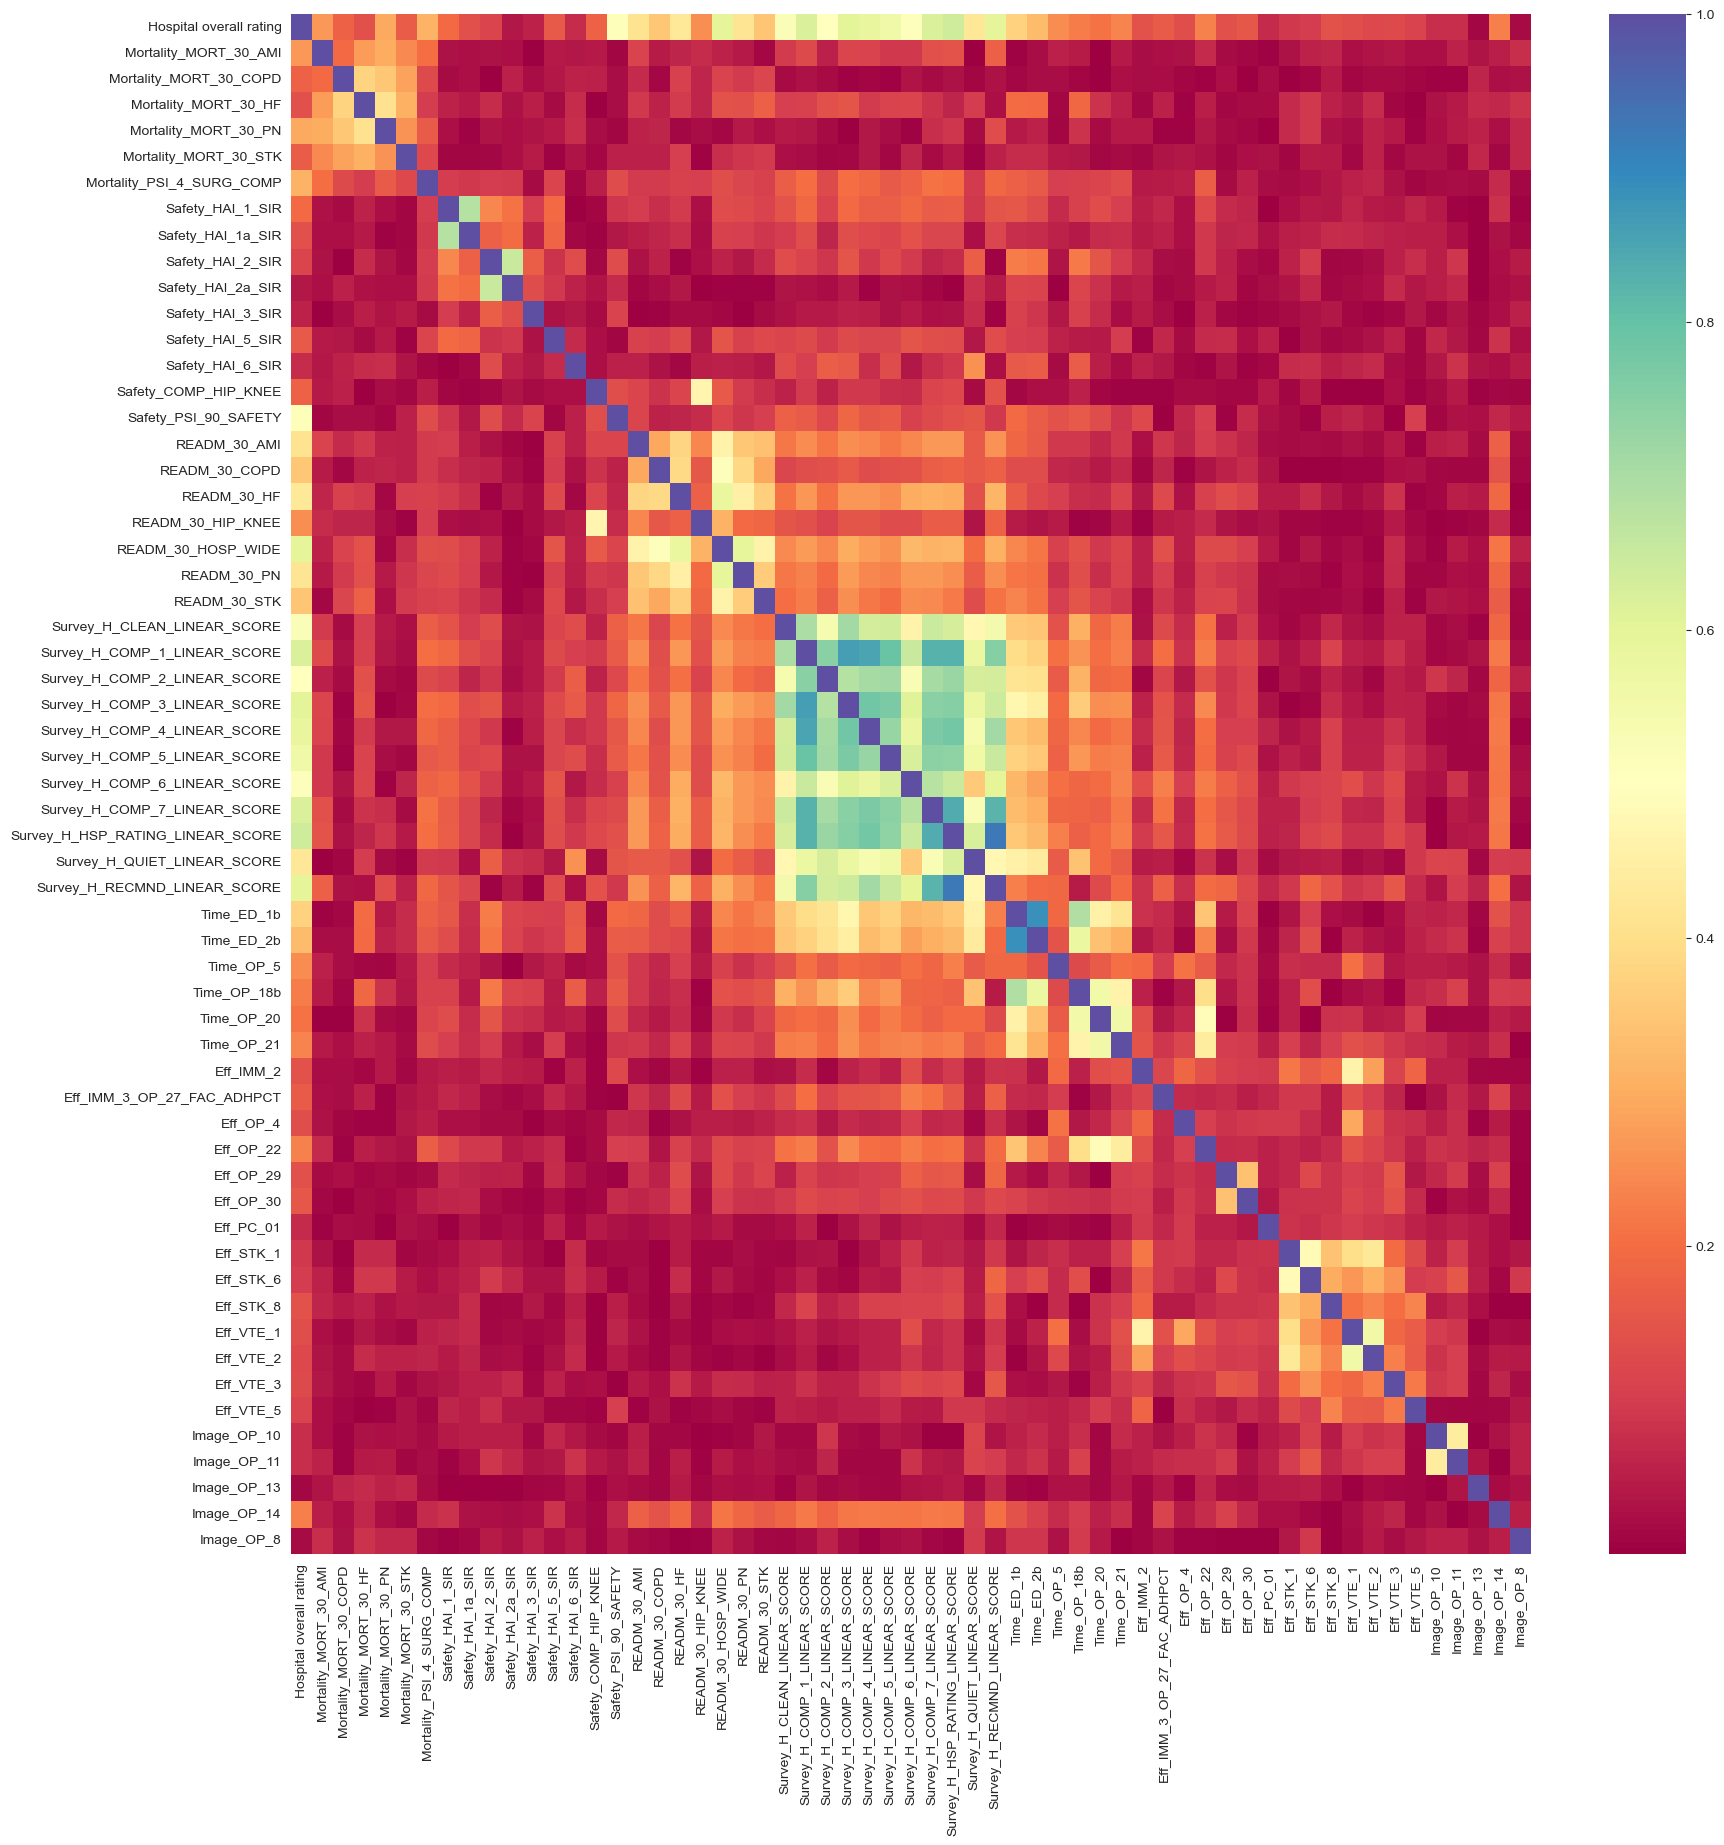

In [99]:
cor = df_final.corr().abs()
plt.figure(figsize=(20,20))

# heatmap
sns.heatmap(cor, cmap="Spectral")
plt.show()


###  <span style="color:navy"> 4.2 Create functions for plotting data that depict the values of different metrics within individual star rating categories.

In [100]:
from sklearn.preprocessing import StandardScaler

def df_scaled(df, measures):
    # Separate 'Hospital overall rating' from measures
    df_ratings = df[['Hospital overall rating']]
    df_measures = df[measures]

    # Scale the measures using StandardScaler
    scaler = StandardScaler()
    df_measures_scaled = pd.DataFrame(scaler.fit_transform(df_measures), columns=measures, index=df_measures.index)

    # Concatenate the scaled measures and the 'Hospital overallr rating'
    df_scaled = pd.concat([df_ratings, df_measures_scaled], axis=1)

    return df_scaled

In [101]:
def Multivariate_line_plot(df, plot_title):
    sns.set_style('whitegrid')
    df_melt = pd.melt(df.reset_index(), id_vars = ['Provider ID','Hospital overall rating'], 
                      var_name = 'Feature', value_name = 'Value')

    fig, ax = plt.subplots(figsize = (12,6))
    ax=sns.lineplot(x = 'Feature', y = 'Value', data = df_melt,
                 hue = 'Hospital overall rating', palette = "Set2")
    plt.setp(ax.get_xticklabels(), rotation=45, ha='right')  
    
    ax=sns.lineplot(x = 'Feature', y = 'Value', data = df_melt[df_melt["Provider ID"] == 140010], color="#00FF00", linewidth=3)
    ax.legend(loc='upper right', title='Hospital overall rating')      
    plt.title(plot_title,fontsize=20)
#   plt.xlabel('Features',  fontsize=20)
    plt.ylabel('Values scaled', fontsize=20)
    plt.tight_layout()    

###  <span style="color:brown"> 4.2 Data Visualisation for Different Measures

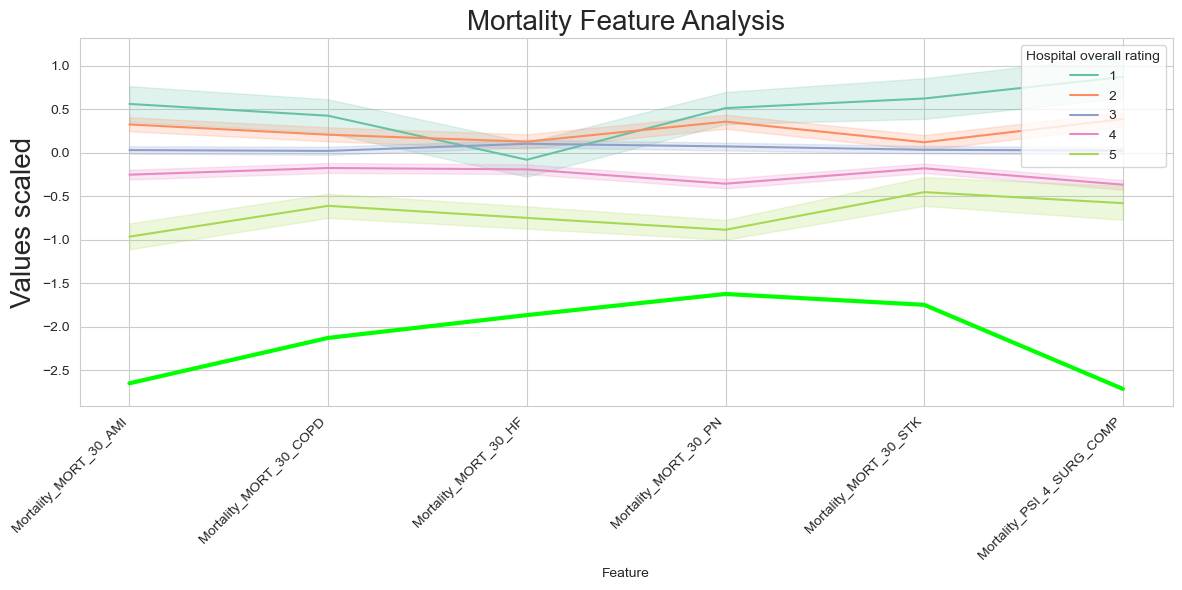

In [102]:
df_mort_scaled = df_scaled(df_final, mortality_measures)
title = 'Mortality Feature Analysis'
Multivariate_line_plot(df_mort_scaled, title)

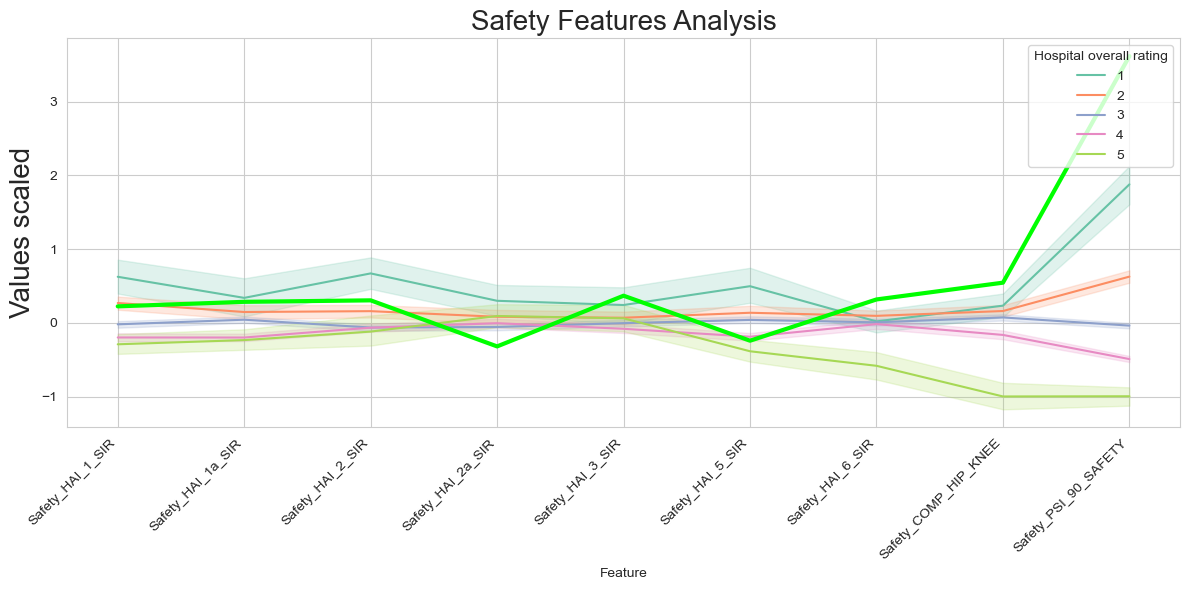

In [103]:
df_safety_scaled = df_scaled(df_final, safety_measures)
title = 'Safety Features Analysis'
Multivariate_line_plot(df_safety_scaled, title)

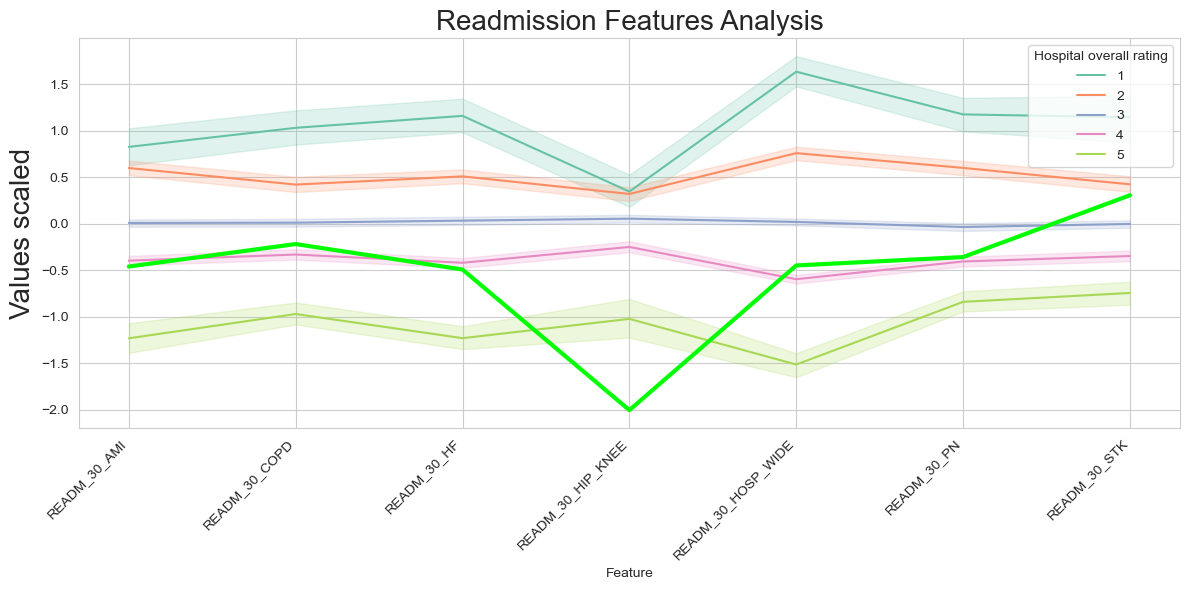

In [104]:
df_readm_scaled =  df_scaled(df_final, readmission_measures)
title = 'Readmission Features Analysis'
Multivariate_line_plot(df_readm_scaled, title)

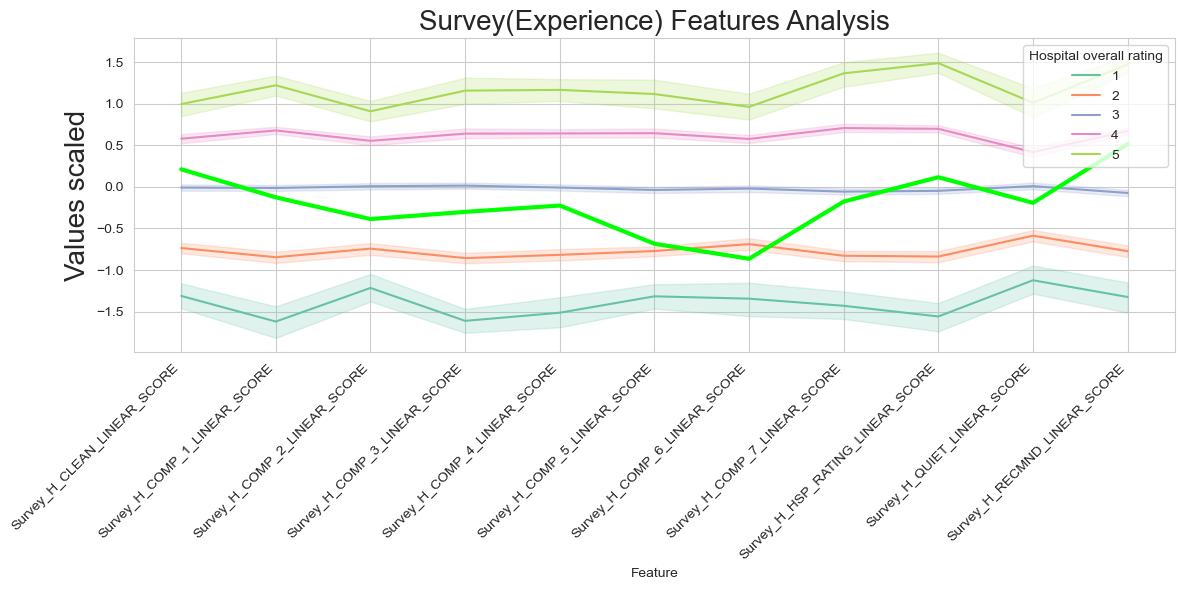

In [105]:
df_survey_scaled =  df_scaled(df_final, survey_measures)
title = 'Survey(Experience) Features Analysis'
Multivariate_line_plot(df_survey_scaled, title)

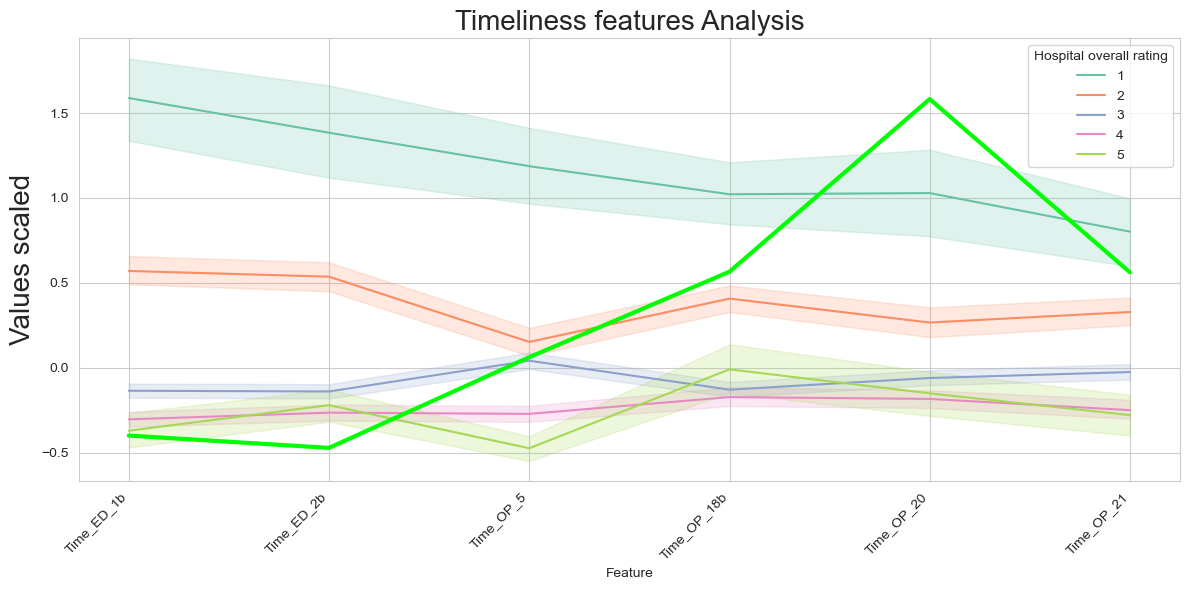

In [106]:
df_time_scaled = df_scaled(df_final, timeliness_measures)
title = 'Timeliness features Analysis'
Multivariate_line_plot(df_time_scaled, title)

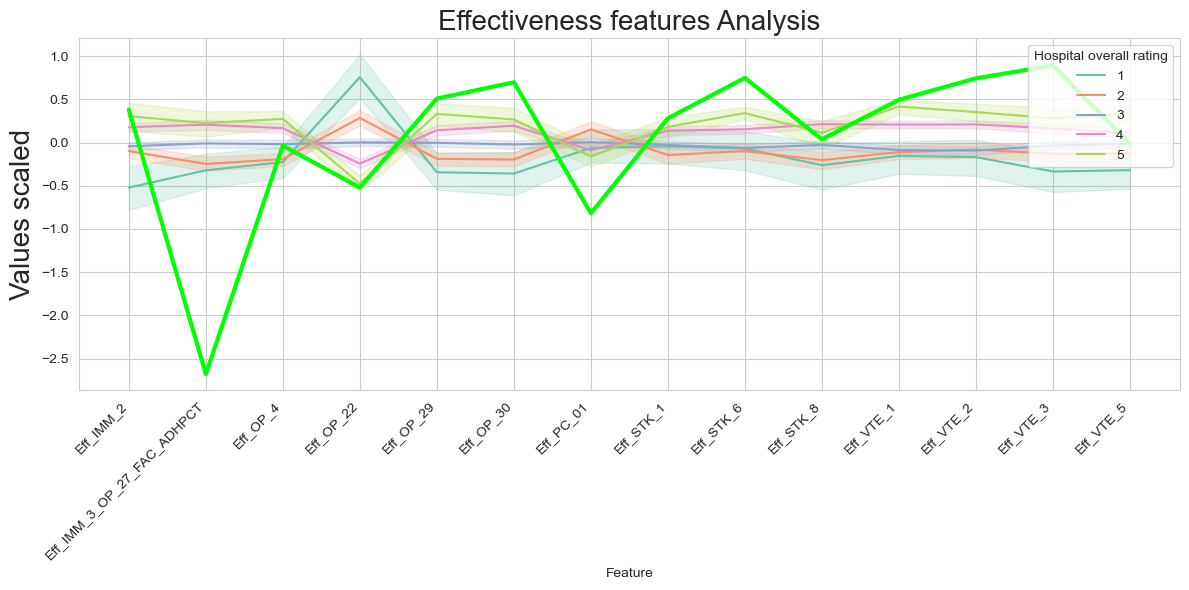

In [107]:
df_eff_scaled = df_scaled(df_final, effectiveness_measures)
title = 'Effectiveness features Analysis'
Multivariate_line_plot(df_eff_scaled, title)

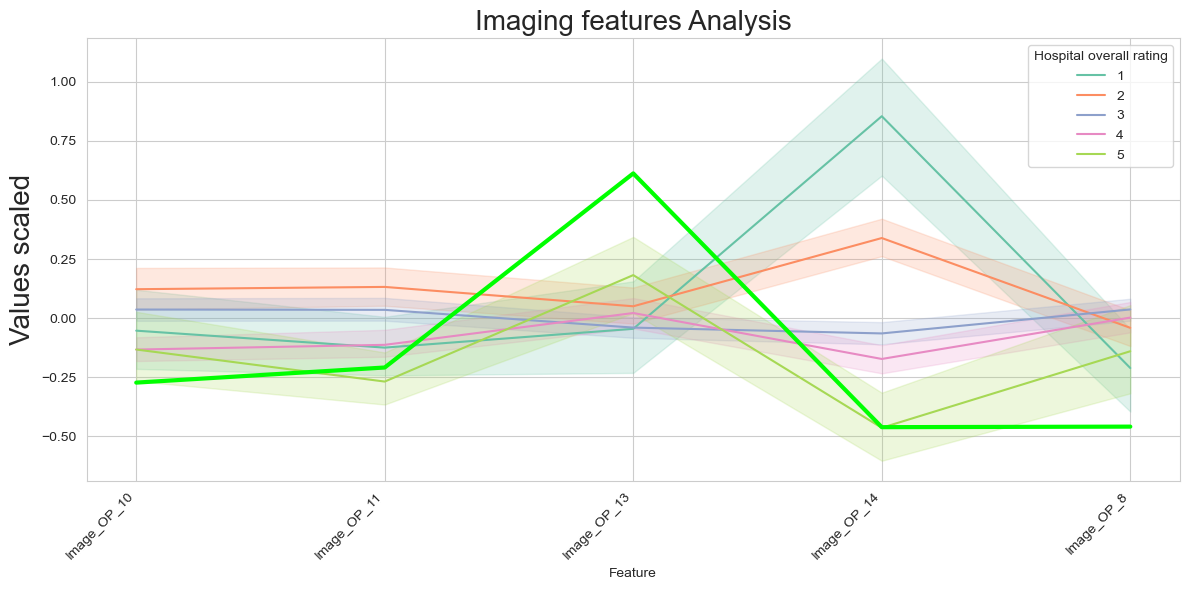

In [108]:
df_image_scaled = df_scaled(df_final, imaging_measures)
title = 'Imaging features Analysis'
Multivariate_line_plot(df_image_scaled, title)

#### Obervations & Inferences:
Mortality Feature Analysis:
Evanston hospital's rating of 3 closely matches with hospital overall rating 5 for most mortality features.
Inference: Evanston hospital demonstrates strong performance in terms of mortality rates, which contributes to its higher overall rating.

Safety Feature Analysis:
Evanston hospital's rating of 3 does not follow a consistent pattern with any hospital overall rating for safety features.
Inference: Safety performance at Evanston hospital varies and does not strongly correlate with its overall rating.

Readmission Feature Analysis:
Evanston hospital's rating of 3 consistently matches with hospital overall rating 1 for all readmission features.
Inference: While Evanston hospital performs well in some areas, it may have challenges related to readmissions, which is reflected in the lower overall rating in this aspect.

Survey (Experience) Feature Analysis:
Evanston hospital's rating of 3 consistently matches with hospital overall rating 5 for all survey (experience) features.
Inference: Patients' experiences at Evanston hospital, as reflected in surveys, are consistently rated highly, which contributes to its higher overall rating.

Timeliness Feature Analysis:
Evanston hospital's rating of 3 does not follow a consistent pattern with any hospital overall rating for timeliness features.
Inference: Evanston hospital's performance in terms of timeliness may vary and does not show a strong correlation with its overall rating.

Effectiveness Feature Analysis:
Similar to imaging, Evanston hospital's rating of 3 consistently matches with hospital overall rating 5 for all effectiveness features.
Inference: Evanston hospital appears to excel in terms of effectiveness, and this is reflected in its higher overall rating.

Imaging Feature Analysis:
Evanston hospital's rating consistently matches with hospital overall rating 5 for almost all imaging features .
Inference: Evanston hospital tends to perform well in imaging-related aspects compared to other aspects, and this aligns with its higher overall rating.

Overall, it appears that Evanston hospital consistently performs well in imaging, effectiveness, patient experience, and mortality aspects, leading to a higher overall rating. However, its performance in timeliness and readmission aspects is less consistent and may contribute to variations in the overall rating. Safety performance shows variability and does not strongly correlate with the overall rating. These inferences provide insights into the hospital's strengths and areas for potential improvement in different dimensions of healthcare quality. 

###  <span style="color:brown"> 4.3 Copy Final Dataset to excel for Model Building.

In [109]:
df_final.to_csv('Final_1.csv', index=False)

## <span style="color:Brown"> 5. Model Pre-processing

In [110]:
# make a copy of df_final.
final1_df = df_final.copy()

In [111]:
final1_df = final1_df.reset_index()
final1_df.head()

,Provider ID,Hospital overall rating,Mortality_MORT_30_AMI,Mortality_MORT_30_COPD,Mortality_MORT_30_HF,Mortality_MORT_30_PN,Mortality_MORT_30_STK,Mortality_PSI_4_SURG_COMP,Safety_HAI_1_SIR,Safety_HAI_1a_SIR,Safety_HAI_2_SIR,Safety_HAI_2a_SIR,Safety_HAI_3_SIR,Safety_HAI_5_SIR,Safety_HAI_6_SIR,Safety_COMP_HIP_KNEE,Safety_PSI_90_SAFETY,READM_30_AMI,READM_30_COPD,READM_30_HF,READM_30_HIP_KNEE,READM_30_HOSP_WIDE,READM_30_PN,READM_30_STK,Survey_H_CLEAN_LINEAR_SCORE,Survey_H_COMP_1_LINEAR_SCORE,Survey_H_COMP_2_LINEAR_SCORE,Survey_H_COMP_3_LINEAR_SCORE,Survey_H_COMP_4_LINEAR_SCORE,Survey_H_COMP_5_LINEAR_SCORE,Survey_H_COMP_6_LINEAR_SCORE,Survey_H_COMP_7_LINEAR_SCORE,Survey_H_HSP_RATING_LINEAR_SCORE,Survey_H_QUIET_LINEAR_SCORE,Survey_H_RECMND_LINEAR_SCORE,Time_ED_1b,Time_ED_2b,Time_OP_5,Time_OP_18b,Time_OP_20,Time_OP_21,Eff_IMM_2,Eff_IMM_3_OP_27_FAC_ADHPCT,Eff_OP_4,Eff_OP_22,Eff_OP_29,Eff_OP_30,Eff_PC_01,Eff_STK_1,Eff_STK_6,Eff_STK_8,Eff_VTE_1,Eff_VTE_2,Eff_VTE_3,Eff_VTE_5,Image_OP_10,Image_OP_11,Image_OP_13,Image_OP_14,Image_OP_8
0,10001,3,12.500000,9.3,12.4,15.5,15.400000,168.260000,1.740000,2.015530,1.427000,2.06406,1.870000,0.422000,0.787,3.800000,0.68,16.500000,21.1,21.4,5.100000,15.4,18.7,12.700000,84.000000,90.00000,92.000000,80.000000,86.000000,77.00000,87.000000,82.000000,89.000000,88.000000,90.000000,269.0,68.0,8.378731,196.0,65.0,99.0,97.0,81.0,96.021698,4.0,72.982085,82.0,0.000000,99.000000,99.000000,87.000000,97.0,99.00000,91.000000,90.000000,6.4,0.900000,7.100000,2.400000,38.100000
1,10005,3,16.000000,7.6,15.5,20.8,15.500000,178.267300,1.062000,0.648000,0.456000,0.69800,0.386000,1.388000,0.405,3.000000,0.85,16.700000,18.0,21.9,5.700000,14.9,16.4,13.400000,83.000000,91.00000,94.000000,84.000000,88.000000,80.00000,88.000000,81.000000,90.000000,86.000000,89.000000,243.0,71.0,12.000000,117.0,27.0,60.0,99.0,83.0,99.000000,2.0,92.000000,92.0,1.000000,98.000000,88.000000,100.000000,95.0,94.00000,100.000000,100.000000,13.3,10.200000,5.300000,4.000000,42.800000
2,10006,2,16.700000,7.1,15.6,18.2,17.900000,178.267300,0.341000,0.443000,0.641000,0.80100,0.310000,1.261000,0.513,3.800000,0.91,16.100000,19.8,20.6,5.000000,15.4,17.9,12.000000,83.000000,91.00000,94.000000,83.000000,87.000000,78.00000,83.000000,80.000000,85.000000,86.000000,84.000000,217.0,78.0,8.763158,133.0,10.0,58.0,100.0,87.0,95.373529,1.0,70.000000,88.0,0.000000,99.000000,97.000000,90.000000,98.0,89.00000,86.000000,92.000000,11.8,4.600000,0.000000,4.600000,45.600000
3,10007,3,14.057596,9.3,14.4,18.8,16.600000,136.430856,0.516028,0.532603,0.000000,0.55586,0.953985,0.986732,0.000,3.085083,0.79,16.843096,19.9,21.1,4.640845,16.6,17.3,12.700000,89.000000,91.00000,96.000000,87.000000,89.000000,82.00000,86.000000,82.000000,87.000000,92.000000,86.000000,219.0,68.0,7.000000,119.0,38.0,90.0,99.0,53.0,89.000000,1.0,0.000000,11.0,2.459343,80.000000,71.000000,93.443495,97.0,99.00000,93.116531,92.887629,24.3,6.100000,4.622147,2.744737,40.293563
4,10008,3,14.057596,8.2,12.7,15.7,14.954805,136.430856,0.516028,0.532603,0.451126,0.55586,0.953985,0.986732,0.585,3.085083,0.90,16.843096,19.2,23.1,4.640845,15.7,16.0,12.526532,87.204734,91.24888,91.878439,85.254639,87.503519,78.53231,86.776711,81.301983,88.512476,82.930902,87.646193,180.0,56.0,8.378731,98.0,27.0,49.0,95.0,43.0,96.021698,1.0,96.000000,97.0,2.459343,96.445447,95.195205,93.443495,99.0,96.44764,93.116531,92.887629,3.6,3.249478,4.622147,0.600000,40.293563


In [112]:
final1_df = final1_df.rename(columns={'Hospital overall rating': 'Rating'})

# Drop the Provider_id column
final1_df = final1_df.drop('Provider ID', axis=1)

In [113]:
final1_df.columns

Index(['Rating', 'Mortality_MORT_30_AMI', 'Mortality_MORT_30_COPD',
       'Mortality_MORT_30_HF', 'Mortality_MORT_30_PN', 'Mortality_MORT_30_STK',
       'Mortality_PSI_4_SURG_COMP', 'Safety_HAI_1_SIR', 'Safety_HAI_1a_SIR',
       'Safety_HAI_2_SIR', 'Safety_HAI_2a_SIR', 'Safety_HAI_3_SIR',
       'Safety_HAI_5_SIR', 'Safety_HAI_6_SIR', 'Safety_COMP_HIP_KNEE',
       'Safety_PSI_90_SAFETY', 'READM_30_AMI', 'READM_30_COPD', 'READM_30_HF',
       'READM_30_HIP_KNEE', 'READM_30_HOSP_WIDE', 'READM_30_PN',
       'READM_30_STK', 'Survey_H_CLEAN_LINEAR_SCORE',
       'Survey_H_COMP_1_LINEAR_SCORE', 'Survey_H_COMP_2_LINEAR_SCORE',
       'Survey_H_COMP_3_LINEAR_SCORE', 'Survey_H_COMP_4_LINEAR_SCORE',
       'Survey_H_COMP_5_LINEAR_SCORE', 'Survey_H_COMP_6_LINEAR_SCORE',
       'Survey_H_COMP_7_LINEAR_SCORE', 'Survey_H_HSP_RATING_LINEAR_SCORE',
       'Survey_H_QUIET_LINEAR_SCORE', 'Survey_H_RECMND_LINEAR_SCORE',
       'Time_ED_1b', 'Time_ED_2b', 'Time_OP_5', 'Time_OP_18b', 'Time_OP_20',
   

### <span style="color:brown"> 5.1 Train Test split and Scaling 
This step includes the model pre-processing step of Train Test split and Scaling the features before Model Building

In [114]:
from sklearn.model_selection import train_test_split
# Train Test Split
# features variables in X
X = final1_df.drop(['Rating'], axis=1)

# Target variable in y
y = final1_df['Rating']

# Splitting the data into train and test data
X_train, X_test, y_train , y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=42)

In [115]:
from sklearn.preprocessing import MinMaxScaler
# Rescaling the features before Modeling as it is sensitive to the scale of the features
scaler = MinMaxScaler()
all_Features = X_train.columns

# fit transform the scaler using the train dataset
X_train[all_Features] = scaler.fit_transform(X_train[all_Features])

# Only transform the test data set using the already fit scaler
X_test[all_Features] = scaler.transform(X_test[all_Features])

In [116]:
print(final1_df.Rating.value_counts())
final1_df.Rating.value_counts(normalize = True).reset_index()

3    1772
4     964
2     684
1     117
5     111
Name: Rating, dtype: int64


,index,Rating
0,3,0.485746
1,4,0.264254
2,2,0.187500
3,1,0.032072
4,5,0.030428


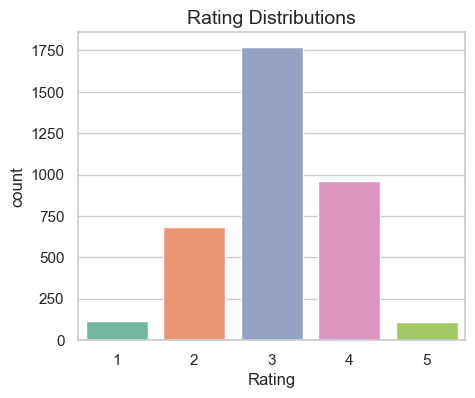

In [117]:
# Create a count plot
sns.set(style="whitegrid")
plt.figure(figsize=(5, 4))  # Adjust the figure size as needed
sns.countplot(x='Rating', data=final1_df, palette="Set2")

# Set the title and adjust font size
plt.title('Rating Distributions', fontsize=14)

# Show the plot
plt.show()

#### Obervation:
The imbalance in the data suggests that there are significantly more observations in the rating categories 3 and 4 compared to the  rating categories 1 and 5. This could potentially affect the performance of machine learning models, particularly if they are sensitive to class imbalances.

## <span style="color:brown"> 6. Model Building

The final stage is the Model Building stage
    
For the rating prediction we will be fitting variety of models and select one which is the having best performance score on test. The Models trained are,
1. Logistic Regression
2. Decision Tree
3. Random Forest

In [118]:
from sklearn import metrics
from sklearn.metrics import  accuracy_score,classification_report, confusion_matrix

In [119]:
def get_Model_Metrics(model_name, y_true=False, y_pred=False):
    confusion = confusion_matrix(y_true, y_pred)

    # Let's check the overall accuracy.
    Accuracy = metrics.accuracy_score(y_true, y_pred)
   
    f1 = metrics.f1_score(y_true, y_pred, labels=None, pos_label=None, average='macro', 
                          sample_weight=None, zero_division='warn')
    
    precision = metrics.precision_score(y_true, y_pred, labels=None, pos_label=None, average='macro', 
                            sample_weight=None, zero_division='warn')
    
    recall = metrics.recall_score(y_true, y_pred, labels=None, pos_label=None, average='macro', 
                                  sample_weight=None, zero_division='warn')

    data = [[model_name, Accuracy, f1, precision , recall]] 
    df = pd.DataFrame(data, columns = ['Model', 'Accuracy', 'F1', 'Precision', 'Recall'])
    add_to_global_summary(df)
    return df 

In [120]:
consolidate_summary = pd.DataFrame()

def add_to_global_summary(df) :
    global consolidate_summary 
    consolidate_summary = consolidate_summary.append(df,ignore_index=True)

#### We can handle imbalanced classes by balancing the classes by SMOTE - Synthetic Minority Oversampling Technique.

#### - Use resampling methods on your training set, never on your test set!

### Logistic Regression

In [121]:
# Logistic Regression
from sklearn.linear_model import LogisticRegressionCV

In [122]:
# SMOTE Resampling technique
from imblearn.over_sampling import SMOTE
smt = SMOTE(random_state=45, k_neighbors=5)
X_resampled, y_resampled = smt.fit_resample(X_train, y_train)
len(X_resampled)

6995

In [123]:
from collections import Counter
print(sorted(Counter(y_resampled).items()))

[(1, 1399), (2, 1399), (3, 1399), (4, 1399), (5, 1399)]


In [124]:
lreg = LogisticRegressionCV(random_state=42, cv=5, multi_class='ovr')
lreg.fit(X_resampled, y_resampled)

LogisticRegressionCV(cv=5, multi_class='ovr', random_state=42)

In [125]:
# Make predictions on the train set
y_resampled_pred = lreg.predict(X_resampled)

In [126]:
from sklearn import metrics
from sklearn.metrics import   accuracy_score ,confusion_matrix, classification_report
print ('Accuracy: ', accuracy_score(y_resampled,y_resampled_pred))
print ('\n clasification report:\n', classification_report(y_resampled,y_resampled_pred))
print ('\n confussion matrix:\n',confusion_matrix(y_resampled,y_resampled_pred))

Accuracy:  0.8351679771265189

 clasification report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00      1399
           2       0.76      0.82      0.79      1399
           3       0.64      0.57      0.60      1399
           4       0.77      0.79      0.78      1399
           5       1.00      1.00      1.00      1399

    accuracy                           0.84      6995
   macro avg       0.83      0.84      0.83      6995
weighted avg       0.83      0.84      0.83      6995


 confussion matrix:
 [[1399    0    0    0    0]
 [   5 1141  226   27    0]
 [   0  290  800  309    0]
 [   0   63  233 1103    0]
 [   0    0    0    0 1399]]


In [127]:
model_name = 'Logistic Regression with OVR(SMOTE)Train'
get_Model_Metrics(model_name, y_resampled,y_resampled_pred)

,Model,Accuracy,F1,Precision,Recall
0,Logistic Regression with OVR(SMOTE)Train,0.835168,0.833256,0.832418,0.835168


In [128]:
# Make predictions on the test set
y_test_pred = lreg.predict(X_test)

In [129]:
# Evaluate the model's performance using classification metrics
print ('Accuracy: ', accuracy_score(y_test, y_test_pred))
print ('\n clasification report:\n', classification_report(y_test,y_test_pred))
print ('\n confussion matrix:\n',confusion_matrix(y_test, y_test_pred))

Accuracy:  0.636986301369863

 clasification report:
               precision    recall  f1-score   support

           1       0.80      0.80      0.80        15
           2       0.49      0.68      0.57       130
           3       0.72      0.57      0.63       373
           4       0.62      0.70      0.66       192
           5       0.78      0.90      0.84        20

    accuracy                           0.64       730
   macro avg       0.68      0.73      0.70       730
weighted avg       0.66      0.64      0.64       730


 confussion matrix:
 [[ 12   3   0   0   0]
 [  3  88  36   3   0]
 [  0  84 212  77   0]
 [  0   5  47 135   5]
 [  0   0   1   1  18]]


In [130]:
model_name = 'Logistic RegressionCV with OVR-(SMOTE)Test'
get_Model_Metrics(model_name, y_test, y_test_pred)

,Model,Accuracy,F1,Precision,Recall
0,Logistic RegressionCV with OVR-(SMOTE)Test,0.636986,0.7001,0.682543,0.729683


### Decision Trees

In [131]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

# Define a range of hyperparameters to search over
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a Decision Tree Classifier
dtc = DecisionTreeClassifier(random_state=42)

# Use GridSearchCV to search for the best hyperparameters
grid_search = GridSearchCV(estimator=dtc, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_resampled, y_resampled)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Create a Decision Tree Classifier with the best hyperparameters
best_dtc = DecisionTreeClassifier(random_state=42, **best_params)

# Fit the model to the training data
best_dtc.fit(X_resampled, y_resampled)

DecisionTreeClassifier(min_samples_split=5, random_state=42)

In [132]:
# Make predictions on the train set
y_resampled_pred_dtc= best_dtc.predict(X_resampled)

In [133]:
# Evaluate the model's performance using classification metrics on train
print ('Accuracy: ', accuracy_score(y_resampled, y_resampled_pred_dtc))
print ('\n clasification report:\n', classification_report(y_resampled,y_resampled_pred_dtc))
print ('\n confussion matrix:\n',confusion_matrix(y_resampled, y_resampled_pred_dtc))

Accuracy:  0.9939957112223017

 clasification report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00      1399
           2       0.99      1.00      0.99      1399
           3       0.99      0.99      0.99      1399
           4       0.99      0.99      0.99      1399
           5       1.00      0.99      1.00      1399

    accuracy                           0.99      6995
   macro avg       0.99      0.99      0.99      6995
weighted avg       0.99      0.99      0.99      6995


 confussion matrix:
 [[1396    3    0    0    0]
 [   2 1393    3    1    0]
 [   2    5 1387    5    0]
 [   1    3    9 1385    1]
 [   0    0    2    5 1392]]


In [134]:
model_name = 'Decision tree with gridsearchCV-Train'
get_Model_Metrics(model_name, y_resampled, y_resampled_pred_dtc)

,Model,Accuracy,F1,Precision,Recall
0,Decision tree with gridsearchCV-Train,0.993996,0.993996,0.994001,0.993996


In [135]:
# Make predictions on the test set
y_test_pred_dtc = best_dtc.predict(X_test)

In [136]:
# Evaluate the model's performance using classification metrics on test
print ('Accuracy: ', accuracy_score(y_test, y_test_pred_dtc))
print ('\n clasification report:\n', classification_report(y_test,y_test_pred_dtc))
print ('\n confussion matrix:\n',confusion_matrix(y_test, y_test_pred_dtc))

Accuracy:  0.8438356164383561

 clasification report:
               precision    recall  f1-score   support

           1       0.42      0.73      0.54        15
           2       0.80      0.82      0.81       130
           3       0.92      0.86      0.89       373
           4       0.82      0.86      0.84       192
           5       0.61      0.70      0.65        20

    accuracy                           0.84       730
   macro avg       0.72      0.79      0.75       730
weighted avg       0.85      0.84      0.85       730


 confussion matrix:
 [[ 11   2   1   1   0]
 [ 10 106  13   1   0]
 [  5  19 320  28   1]
 [  0   4  15 165   8]
 [  0   1   0   5  14]]


In [137]:
model_name = 'Decision tree with gridsearchCV-Test'
get_Model_Metrics(model_name, y_test, y_test_pred_dtc)

,Model,Accuracy,F1,Precision,Recall
0,Decision tree with gridsearchCV-Test,0.843836,0.745034,0.715342,0.7932


### Ensemble Method-Random Forest

In [138]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
rf = RandomForestClassifier(random_state=42, n_jobs=-1)

In [139]:
hyper_params = {'max_depth': [3, 5, 10, 15],
                'max_features': [3, 5, 7],
                'min_samples_leaf': [20, 50, 100],
                'n_estimators': [20, 50, 80, 100]
               }

In [140]:
from sklearn.model_selection import GridSearchCV
rf_CV = GridSearchCV(estimator=rf, 
             param_grid=hyper_params,
             verbose=1,
             cv=5,
             n_jobs=-1,
             return_train_score=True)

In [141]:
rf_CV.fit(X_resampled, y_resampled)

Fitting 5 folds for each of 144 candidates, totalling 720 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [3, 5, 10, 15], 'max_features': [3, 5, 7],
                         'min_samples_leaf': [20, 50, 100],
                         'n_estimators': [20, 50, 80, 100]},
             return_train_score=True, verbose=1)

In [142]:
rf_CV.best_score_

0.9482487491065046

In [143]:
rf_CV_df = pd.DataFrame(rf_CV.cv_results_)
para_cols = ['param_max_depth','param_max_features','param_min_samples_leaf','param_n_estimators', 'rank_test_score',  'mean_test_score']
rf_CV_df.sort_values(by='rank_test_score')[para_cols].head()

,param_max_depth,param_max_features,param_min_samples_leaf,param_n_estimators,rank_test_score,mean_test_score
134,15,7,20,80,1,0.948249
99,10,7,20,100,2,0.947677
98,10,7,20,80,3,0.947534
135,15,7,20,100,4,0.947105
133,15,7,20,50,5,0.945818


In [144]:
best_rf_model = rf_CV.best_estimator_

In [145]:
# Make predictions on the train set
y_resampled_pred_rf= best_rf_model.predict(X_resampled)

In [146]:
# Evaluate the model's performance using classification metrics on train
print ('Accuracy: ', accuracy_score(y_resampled, y_resampled_pred_rf))
print ('\n clasification report:\n', classification_report(y_resampled,y_resampled_pred_rf))
print ('\n confussion matrix:\n',confusion_matrix(y_resampled, y_resampled_pred_rf))

Accuracy:  0.9784131522516083

 clasification report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00      1399
           2       0.96      0.99      0.97      1399
           3       0.97      0.94      0.95      1399
           4       0.97      0.97      0.97      1399
           5       1.00      1.00      1.00      1399

    accuracy                           0.98      6995
   macro avg       0.98      0.98      0.98      6995
weighted avg       0.98      0.98      0.98      6995


 confussion matrix:
 [[1394    5    0    0    0]
 [   1 1379   16    3    0]
 [   1   45 1321   31    1]
 [   0   11   31 1352    5]
 [   0    0    0    1 1398]]


In [147]:
model_name = 'Random Forest with gridsearchCV-Train'
get_Model_Metrics(model_name, y_resampled, y_resampled_pred_rf)

,Model,Accuracy,F1,Precision,Recall
0,Random Forest with gridsearchCV-Train,0.978413,0.978372,0.978468,0.978413


In [148]:
# Make predictions on the test set
y_test_pred_rf = best_rf_model.predict(X_test)

In [149]:
# Evaluate the model's performance using classification metrics on test
print ('Accuracy: ', accuracy_score(y_test, y_test_pred_rf))
print ('\n clasification report:\n', classification_report(y_test,y_test_pred_rf))
print ('\n confussion matrix:\n',confusion_matrix(y_test, y_test_pred_rf))

Accuracy:  0.8986301369863013

 clasification report:
               precision    recall  f1-score   support

           1       0.75      0.80      0.77        15
           2       0.81      0.93      0.86       130
           3       0.95      0.89      0.92       373
           4       0.89      0.91      0.90       192
           5       0.94      0.80      0.86        20

    accuracy                           0.90       730
   macro avg       0.87      0.87      0.86       730
weighted avg       0.90      0.90      0.90       730


 confussion matrix:
 [[ 12   3   0   0   0]
 [  3 121   5   1   0]
 [  1  23 332  17   0]
 [  0   3  13 175   1]
 [  0   0   1   3  16]]


In [150]:
model_name = 'Random Forest with gridsearchCV-Test'
get_Model_Metrics(model_name, y_test, y_test_pred_rf)

,Model,Accuracy,F1,Precision,Recall
0,Random Forest with gridsearchCV-Test,0.89863,0.864507,0.867314,0.866462


### Random Forest Classifier taken to identify important features since with  good overall Scores(Accuracy and F1 SCore).

## <span style="color:brown"> 7. Identifying the important Features and Making Recommendations

### <span style="color:brown"> 7.1 Identifying the Important Features

In [151]:
!pip install eli5

In [152]:
import eli5
from eli5.sklearn import PermutationImportance

In [153]:
perm_importance = PermutationImportance(best_rf_model, random_state=42).fit(X_resampled, y_resampled)

In [154]:
eli5.show_weights(perm_importance, feature_names=X_resampled.columns.tolist())

Weight,Feature
0.0312 ± 0.0017,Image_OP_8
0.0266 ± 0.0036,Safety_PSI_90_SAFETY
0.0191 ± 0.0029,Time_OP_5
0.0165 ± 0.0024,Eff_OP_4
0.0152 ± 0.0017,READM_30_HOSP_WIDE
0.0055 ± 0.0022,Mortality_PSI_4_SURG_COMP
0.0050 ± 0.0013,READM_30_AMI
0.0044 ± 0.0018,Safety_HAI_5_SIR
0.0036 ± 0.0014,Safety_HAI_1a_SIR
0.0032 ± 0.0013,Safety_HAI_3_SIR


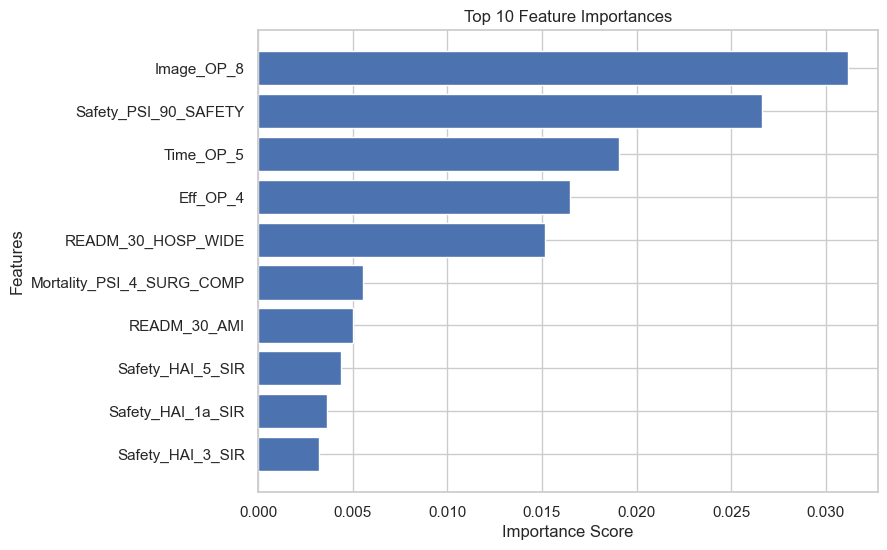

In [155]:
feature_names = X_resampled.columns.tolist()
importances = perm_importance.feature_importances_

feature_names = X_resampled.columns.tolist()
importances = perm_importance.feature_importances_

# Sort features by importance in descending order
sorted_idx = importances.argsort()[::-1]
sorted_feature_names = [feature_names[i] for i in sorted_idx]
sorted_importances = importances[sorted_idx]

# Display only the top 10 features
top_n = 10
top_feature_names = sorted_feature_names[:top_n]
top_importances = sorted_importances[:top_n]
plt.subplots(figsize=(8, 6))

# Reverse the order to have the highest importance at the top
plt.barh(range(len(top_importances)), top_importances[::-1], align='center')

# Reverse the feature names and display them with proper spacing
plt.yticks(range(len(top_importances)), top_feature_names[::-1])
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.title('Top 10 Feature Importances')
plt.show()

### <span style="color:brown"> 7.2 Observations and Inferences

Image_OP_8(MRI Lumbar Spine for Low Back Pain):   
A higher importance score suggests that the Efficient Use of Medical Imaging may significantly affect hospital ratings.

Safety_PSI_90_SAFETY(Serious complications/Patient Safety for Selected Indicators (PSI)) :  
A higher importance score indicates that safety practices and outcomes are vital contributors to hospital ratings.

Time_OP_5(Median Time to ECG): 
Efficient use of time in hospital operations is significant for hospital rating.

Eff_OP_4(Aspirin at Arrival): 
Efficient delivery of medical services impacts hospital ratings.

READM_30_HOSP_WIDE(HWR Hospital-Wide All-Cause Unplanned Readmission):    
Hospital-wide readmission rates within 30 days of a patient's discharge. A higher importance suggests that reducing readmissions is crucial for hospital ratings.

Mortality_PSI_4_SURG_COMP(Death Among Surgical Patients with Serious Treatable Complications):   
It indicates that surgical quality and safety play a role in hospital ratings.

READM_30_AMI(Acute Myocardial Infarction (AMI) 30-Day Readmission Rate):    
Lower readmission rates for AMI patients are important for hospital ratings.

Safety_HAI_5_SIR(Methicillin-resistant Staphylococcus Aureus (MRSA) Blood Laboratory-identified Events (Bloodstream infections)): 
A lower infection rate contributes to higher safety and, consequently, better hospital ratings.

Safety_HAI_1a_SIR(Central line-associated blood stream infections (CLABSI) in ICUs only):  
A lower HAI rate is a positive indicator of safety and contributes to hospital ratings.

Safety_HAI_3_SIR)(Surgical Site Infection from colon surgery (SSI: Colon)):  
HAI rate, which, when lower, reflects better hospital safety and potentially higher ratings.

## <span style="color:brown"> 8.Recommendations:

#### Efficient Use of Medical Imaging (Image_OP_8):
Implement protocols to ensure the judicious use of medical imaging, such as MRIs for low back pain, to reduce unnecessary tests and costs.
#### Patient Safety (Safety_PSI_90_SAFETY):
Enhance safety practices and protocols to minimize serious complications and adverse events. Invest in staff training and quality assurance measures.
#### Efficient Use of Time in Hospital Operations (Time_OP_5):
Streamline hospital operations to reduce the median time to ECG, improving patient care efficiency and experience.
#### Efficient Delivery of Medical Services (Eff_OP_4):
Optimize processes to ensure the timely administration of aspirin upon patient arrival, enhancing overall service efficiency.
#### Reducing Hospital-Wide Readmissions (READM_30_HOSP_WIDE):
Develop readmission reduction strategies, including better post-discharge care coordination and follow-up, to lower hospital-wide readmission rates.
#### Surgical Quality and Safety (Mortality_PSI_4_SURG_COMP):
Invest in surgical quality improvement initiatives, surgeon training, and patient safety protocols to minimize complications and enhance surgical outcomes.
#### Reducing Readmission Rates for AMI Patients (READM_30_AMI):
Implement targeted interventions and follow-up care to reduce readmission rates for Acute Myocardial Infarction (AMI) patients.
#### Reducing MRSA Infections (Safety_HAI_5_SIR):
Strengthen infection control measures and protocols to lower the incidence of Methicillin-resistant Staphylococcus Aureus (MRSA) infections.
#### Reducing Central Line-Associated Bloodstream Infections (Safety_HAI_1a_SIR):
Focus on intensive care units (ICUs) to reduce Central line-associated blood stream infections (CLABSI), which significantly impact safety ratings.
#### Reducing Surgical Site Infections (Safety_HAI_3_SIR):
Implement enhanced infection control practices specifically targeted at reducing surgical site infections following colon surgery.  
By addressing these areas and implementing targeted improvement strategies, Evanston Hospital can work toward improving its CMS rating and, consequently, its revenue. Regular assessment and adjustments based on performance data and patient feedback will be crucial in this continuous improvement process.